In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train= pd.read_csv('trainstore.csv')
test=pd.read_csv('test store.csv')

In [3]:
train

Item_ID      Store_ID       Item_Store_ID  Item_Weight  \
0      DRA12  BABATUNJI010  DRA12_BABATUNJI010        11.60   
1      DRA12  BABATUNJI013  DRA12_BABATUNJI013        11.60   
2      DRA12  BABATUNJI017  DRA12_BABATUNJI017        11.60   
3      DRA12  BABATUNJI018  DRA12_BABATUNJI018        11.60   
4      DRA12  BABATUNJI035  DRA12_BABATUNJI035        11.60   
...      ...           ...                 ...          ...   
4985   NCZ54  BABATUNJI019  NCZ54_BABATUNJI019          NaN   
4986   NCZ54  BABATUNJI027  NCZ54_BABATUNJI027          NaN   
4987   NCZ54  BABATUNJI045  NCZ54_BABATUNJI045        14.65   
4988   NCZ54  BABATUNJI046  NCZ54_BABATUNJI046        14.65   
4989   NCZ54  BABATUNJI049  NCZ54_BABATUNJI049        14.65   

     Item_Sugar_Content  Item_Visibility    Item_Type  Item_Price  \
0             Low Sugar         0.068535  Soft Drinks      357.54   
1             Low Sugar         0.040912  Soft Drinks      355.79   
2             Low Sugar         0.041178  Soft Drinks      350.79   
3             Low Sugar         0.041113  Soft Drinks      355.04   
4       Ultra Low Sugar         0.000000  Soft Drinks      354.79   
...                 ...              ...          ...         ...   
4985          Low Sugar         0.145952    Household      402.39   
4986          Low Sugar         0.082956    Household      410.14   
4987          Low Sugar         0.083528    Household      406.14   
4988          Low Sugar         0.083359    Household      404.89   
4989          Low Sugar         0.083489    Household      403.39   

      Store_Start_Year Store_Size Store_Location_Type         Store_Type  \
0                 2005        NaN           Cluster 3      Grocery Store   
1                 1994       High           Cluster 3  Supermarket Type1   
2                 2014        NaN           Cluster 2  Supermarket Type1   
3                 2016     Medium           Cluster 3  Supermarket Type2   
4                 2011      Small           Cluster 2  Supermarket Type1   
...                ...        ...                 ...                ...   
4985              1992      Small           Cluster 1      Grocery Store   
4986              1992     Medium           Cluster 3  Supermarket Type3   
4987              2009        NaN           Cluster 2  Supermarket Type1   
4988              2004      Small           Cluster 1  Supermarket Type1   
4989              2006     Medium           Cluster 1  Supermarket Type1   

      Item_Store_Returns  
0                 709.08  
1                6381.69  
2                6381.69  
3                2127.23  
4                2481.77  
...                  ...  
4985              406.14  
4986            13808.69  
4987             5685.93  
4988            11778.00  
4989            17870.07  

[4990 rows x 13 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [5]:
train.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

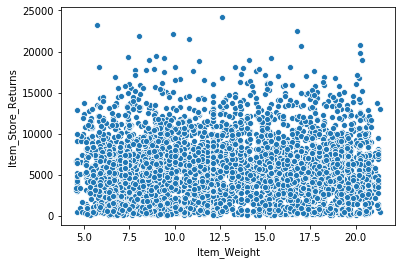

In [6]:
sns.scatterplot(x='Item_Weight',y='Item_Store_Returns',data=train)

1.032936284956518

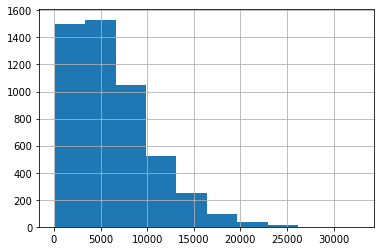

In [7]:
train['Item_Store_Returns'].hist()
train['Item_Store_Returns'].skew()

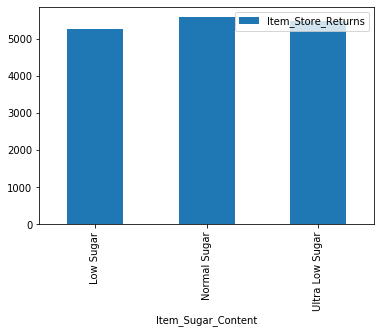

In [8]:
p=pd.pivot_table(data=train,index='Item_Sugar_Content',values='Item_Store_Returns',aggfunc=np.median)
p.plot(kind='bar')

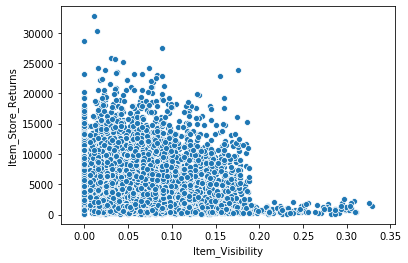

In [9]:
sns.scatterplot(data=train, y='Item_Store_Returns', x='Item_Visibility')

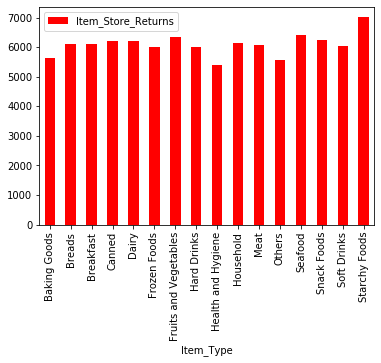

In [10]:
p=pd.pivot_table(data=train,index='Item_Type',values='Item_Store_Returns',aggfunc=np.mean)
p.plot(kind='bar',color='r')

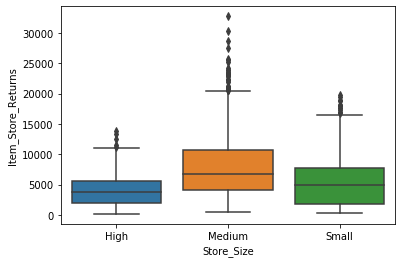

In [11]:
sns.boxplot(data=train,x='Store_Size',y='Item_Store_Returns')


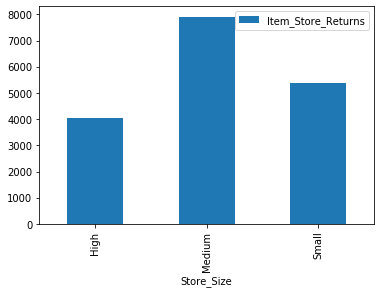

In [12]:
p=pd.pivot_table(data=train,index='Store_Size',values='Item_Store_Returns')
p.plot(kind='bar')

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.2+ KB


In [14]:
df=pd.concat([train,test])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8522 entries, 0 to 3531
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              8522 non-null   object 
 1   Store_ID             8522 non-null   object 
 2   Item_Store_ID        8522 non-null   object 
 3   Item_Weight          7059 non-null   float64
 4   Item_Sugar_Content   8522 non-null   object 
 5   Item_Visibility      8522 non-null   float64
 6   Item_Type            8522 non-null   object 
 7   Item_Price           8522 non-null   float64
 8   Store_Start_Year     8522 non-null   int64  
 9   Store_Size           6113 non-null   object 
 10  Store_Location_Type  8522 non-null   object 
 11  Store_Type           8522 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 932.1+ KB


In [16]:
df.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [17]:
df['Store_Start_Year']=2020-df['Store_Start_Year']
df['Store_Start_Year']

0       15
1       26
2        6
3        4
4        9
        ..
3527    15
3528    26
3529    14
3530    15
3531    26
Name: Store_Start_Year, Length: 8522, dtype: int64

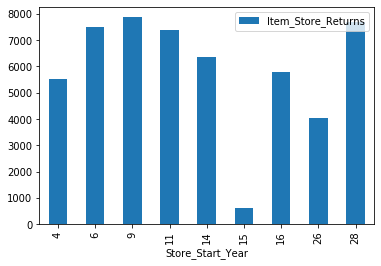

In [18]:
p=pd.pivot_table(data=df,index='Store_Start_Year',values='Item_Store_Returns')
p.plot(kind='bar')

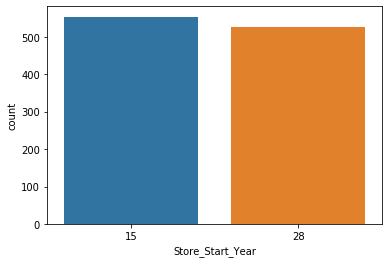

In [19]:
sns.countplot(data=df[df['Store_Type']=='Grocery Store'],x='Store_Start_Year')

In [20]:
df['Item_Weight'].fillna(df['Item_ID'].map(df.groupby('Item_ID').mean()['Item_Weight']),inplace=True)
df['Item_Weight'].isnull().sum()

4

In [21]:
#sns.pairplot(data=df)

In [22]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [23]:
df['Item_Weight'].isnull().sum()

0

In [24]:

df['Store_Size'].fillna(df['Store_ID'].map(df.groupby('Store_ID').describe(include='all')['Store_Size']['top'])
                        ,inplace=True)
df['Store_Size'].isnull().sum()

2409

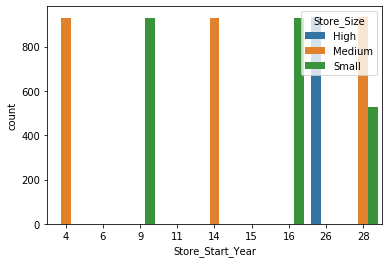

In [25]:
sns.countplot(data=df,x='Store_Start_Year',hue='Store_Size')

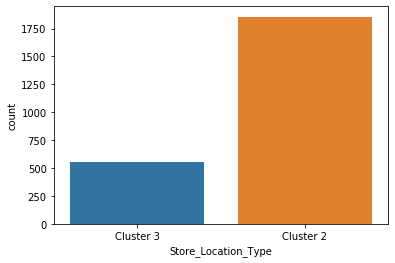

In [26]:
sns.countplot(df[df['Store_Size'].isnull()]['Store_Location_Type'])

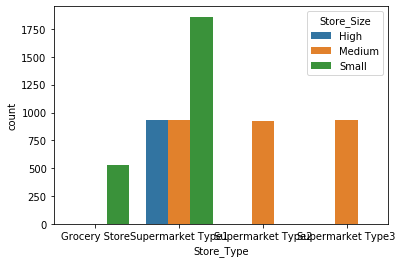

In [27]:
sns.countplot(data=df,x='Store_Type',hue='Store_Size')

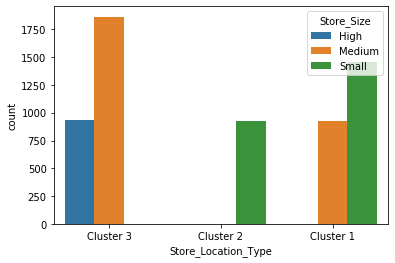

In [28]:
sns.countplot(data=df,hue='Store_Size',x='Store_Location_Type')

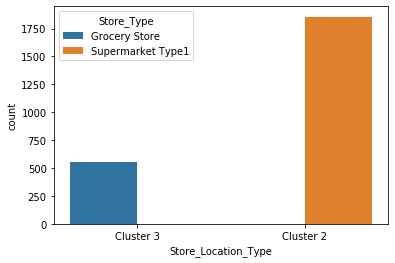

In [29]:
sns.countplot(data=df[df['Store_Size'].isnull()],hue='Store_Type',x='Store_Location_Type')

In [30]:
df[df['Store_Size'].isnull()].head(5)

Item_ID      Store_ID       Item_Store_ID  Item_Weight Item_Sugar_Content  \
0   DRA12  BABATUNJI010  DRA12_BABATUNJI010        11.60          Low Sugar   
2   DRA12  BABATUNJI017  DRA12_BABATUNJI017        11.60          Low Sugar   
5   DRA12  BABATUNJI045  DRA12_BABATUNJI045        11.60          Low Sugar   
6   DRA24  BABATUNJI010  DRA24_BABATUNJI010        19.35       Normal Sugar   
8   DRA24  BABATUNJI017  DRA24_BABATUNJI017        19.35       Normal Sugar   

   Item_Visibility    Item_Type  Item_Price  Store_Start_Year Store_Size  \
0         0.068535  Soft Drinks      357.54                15        NaN   
2         0.041178  Soft Drinks      350.79                 6        NaN   
5         0.000000  Soft Drinks      354.04                11        NaN   
6         0.066832  Soft Drinks      409.72                15        NaN   
8         0.040154  Soft Drinks      411.72                 6        NaN   

  Store_Location_Type         Store_Type  Item_Store_Returns  
0           Cluster 3      Grocery Store              709.08  
2           Cluster 2  Supermarket Type1             6381.69  
5           Cluster 2  Supermarket Type1             9572.54  
6           Cluster 3      Grocery Store              818.93  
8           Cluster 2  Supermarket Type1             2866.27

In [31]:
df['Store_Size'].fillna(df['Store_Location_Type'].map({'Cluster 2':'Small','Cluster 3':'Medium'}),inplace=True)
df['Store_Size'].isnull().sum()

0

In [32]:
df['Store_Start_Year'].replace(df['Store_Start_Year'].unique(),range(1,10),inplace=True)

In [33]:
df['Item_Sugar_Content']=df['Item_Sugar_Content'].map({'Ultra Low Sugar':1,'Low Sugar':2,'Normal Sugar':3})

In [34]:
df['Item_Type'].replace(df['Item_Type'].unique(),range(1,(df['Item_Type'].nunique()+1)),inplace=True)


In [35]:
df['Store_Size'].replace(df['Store_Size'].unique(),range(1,(df['Store_Size'].nunique()+1)),inplace=True)

In [36]:
df['Store_Location_Type'].replace(df['Store_Location_Type'].unique(),range(1,(df['Store_Location_Type'].nunique()+1)),inplace=True)

In [37]:
df['Store_Type'].replace(df['Store_Type'].unique(),range(1,(df['Store_Type'].nunique()+1)),inplace=True)

In [38]:
df.head(10)

Item_ID      Store_ID       Item_Store_ID  Item_Weight  Item_Sugar_Content  \
0   DRA12  BABATUNJI010  DRA12_BABATUNJI010        11.60                   2   
1   DRA12  BABATUNJI013  DRA12_BABATUNJI013        11.60                   2   
2   DRA12  BABATUNJI017  DRA12_BABATUNJI017        11.60                   2   
3   DRA12  BABATUNJI018  DRA12_BABATUNJI018        11.60                   2   
4   DRA12  BABATUNJI035  DRA12_BABATUNJI035        11.60                   1   
5   DRA12  BABATUNJI045  DRA12_BABATUNJI045        11.60                   2   
6   DRA24  BABATUNJI010  DRA24_BABATUNJI010        19.35                   3   
7   DRA24  BABATUNJI013  DRA24_BABATUNJI013        19.35                   3   
8   DRA24  BABATUNJI017  DRA24_BABATUNJI017        19.35                   3   
9   DRA24  BABATUNJI019  DRA24_BABATUNJI019        19.35                   3   

   Item_Visibility  Item_Type  Item_Price  Store_Start_Year  Store_Size  \
0         0.068535          1      357.54                 1           1   
1         0.040912          1      355.79                 2           2   
2         0.041178          1      350.79                 3           3   
3         0.041113          1      355.04                 4           1   
4         0.000000          1      354.79                 5           3   
5         0.000000          1      354.04                 6           3   
6         0.066832          1      409.72                 1           1   
7         0.039895          1      406.22                 2           2   
8         0.040154          1      411.72                 3           3   
9         0.069909          1      408.22                 7           3   

   Store_Location_Type  Store_Type  Item_Store_Returns  
0                    1           1              709.08  
1                    1           2             6381.69  
2                    2           2             6381.69  
3                    1           3             2127.23  
4                    2           2             2481.77  
5                    2           2             9572.54  
6                    1           1              818.93  
7                    1           2            11055.61  
8                    2           2             2866.27  
9                    3           1             1228.40

In [39]:
df.drop(['Item_ID','Store_ID','Item_Store_ID'],axis=1,inplace=True)
#df.columns

In [40]:
#df=pd.get_dummies(df,columns=['Item_Sugar_Content','Store_Size','Store_Type','Store_Location_Type'],drop_first=True)

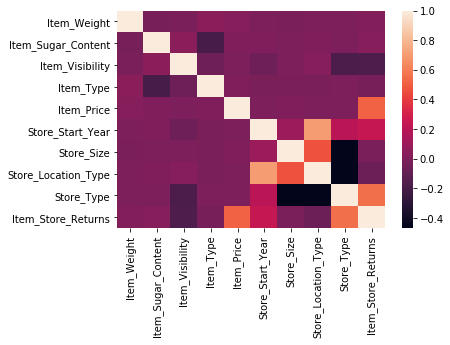

In [41]:
sns.heatmap(df.corr())

In [42]:
df_train=df.iloc[:4990].copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4990 entries, 0 to 4989
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_Weight          4990 non-null   float64
 1   Item_Sugar_Content   4990 non-null   int64  
 2   Item_Visibility      4990 non-null   float64
 3   Item_Type            4990 non-null   int64  
 4   Item_Price           4990 non-null   float64
 5   Store_Start_Year     4990 non-null   int64  
 6   Store_Size           4990 non-null   int64  
 7   Store_Location_Type  4990 non-null   int64  
 8   Store_Type           4990 non-null   int64  
 9   Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 428.8 KB


In [43]:
df_test=df.iloc[-3532:].copy()
df_test.drop('Item_Store_Returns',axis=1,inplace=True)

In [44]:
df_test

Item_Weight  Item_Sugar_Content  Item_Visibility  Item_Type  Item_Price  \
0           8.270                   3         0.214125          1      459.98   
1           8.270                   3         0.127821          1      464.98   
2           7.390                   2         0.082171          1      477.38   
3           6.115                   3         0.011791          1      472.63   
4           6.115                   3         0.007038          1      473.13   
...           ...                 ...              ...        ...         ...   
3527       10.500                   2         0.000000         15      595.81   
3528       10.500                   2         0.011279         15      592.56   
3529       10.500                   1         0.011305         15      588.81   
3530        9.600                   2         0.040970         14      471.80   
3531        9.600                   2         0.024457         14      466.55   

      Store_Start_Year  Store_Size  Store_Location_Type  Store_Type  
0                    1           1                    1           1  
1                    2           2                    1           2  
2                    2           2                    1           2  
3                    1           1                    1           1  
4                    2           2                    1           2  
...                ...         ...                  ...         ...  
3527                 1           1                    1           1  
3528                 2           2                    1           2  
3529                 8           1                    3           2  
3530                 1           1                    1           1  
3531                 2           2                    1           2  

[3532 rows x 9 columns]

In [45]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df_train[['Item_Weight','Item_Price','Item_Visibility']]=sc.fit_transform(df_train[['Item_Weight','Item_Price','Item_Visibility']])
df_test[['Item_Weight','Item_Price','Item_Visibility']]=sc.transform(df_test[['Item_Weight','Item_Price','Item_Visibility']])

In [46]:
y_train= df_train['Item_Store_Returns']
X_train= df_train.drop('Item_Store_Returns',axis=1)

In [47]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [49]:
cv=GridSearchCV(CatBoostRegressor(cat_features=['Item_Sugar_Content','Store_Start_Year','Store_Size','Store_Type','Store_Location_Type']),{'learning_rate':[0.0068,0.007]},cv=8,return_train_score=True)
cv.fit(X_train,y_train)
pd.DataFrame(cv.cv_results_)[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score')

0:	learn: 4438.7181313	total: 195ms	remaining: 3m 14s
1:	learn: 4422.9459783	total: 228ms	remaining: 1m 53s
2:	learn: 4407.3554452	total: 245ms	remaining: 1m 21s
3:	learn: 4391.5445223	total: 278ms	remaining: 1m 9s
4:	learn: 4375.6448565	total: 302ms	remaining: 1m
5:	learn: 4361.6377909	total: 320ms	remaining: 53s
6:	learn: 4346.6575850	total: 388ms	remaining: 55s
7:	learn: 4331.4530199	total: 421ms	remaining: 52.2s
8:	learn: 4316.7482364	total: 466ms	remaining: 51.3s
9:	learn: 4302.4691709	total: 503ms	remaining: 49.8s
10:	learn: 4287.8053847	total: 570ms	remaining: 51.3s
11:	learn: 4273.1100164	total: 610ms	remaining: 50.2s
12:	learn: 4259.5240265	total: 628ms	remaining: 47.7s
13:	learn: 4245.5196453	total: 647ms	remaining: 45.6s
14:	learn: 4231.1402295	total: 677ms	remaining: 44.5s
15:	learn: 4217.0723571	total: 694ms	remaining: 42.7s
16:	learn: 4203.3722327	total: 714ms	remaining: 41.3s
17:	learn: 4189.6248866	total: 728ms	remaining: 39.7s
18:	learn: 4177.0668453	total: 747ms	remai

152:	learn: 3195.9286374	total: 4.48s	remaining: 24.8s
153:	learn: 3192.5011978	total: 4.5s	remaining: 24.7s
154:	learn: 3189.2583264	total: 4.54s	remaining: 24.7s
155:	learn: 3185.9469737	total: 4.56s	remaining: 24.7s
156:	learn: 3182.9200134	total: 4.59s	remaining: 24.6s
157:	learn: 3179.7388334	total: 4.62s	remaining: 24.6s
158:	learn: 3176.7648573	total: 4.65s	remaining: 24.6s
159:	learn: 3173.8225507	total: 4.67s	remaining: 24.5s
160:	learn: 3170.8211115	total: 4.7s	remaining: 24.5s
161:	learn: 3167.6463714	total: 4.72s	remaining: 24.4s
162:	learn: 3164.8133707	total: 4.75s	remaining: 24.4s
163:	learn: 3161.8577388	total: 4.79s	remaining: 24.4s
164:	learn: 3158.8801015	total: 4.83s	remaining: 24.5s
165:	learn: 3155.8606525	total: 4.88s	remaining: 24.5s
166:	learn: 3153.1215231	total: 4.89s	remaining: 24.4s
167:	learn: 3150.3199411	total: 4.92s	remaining: 24.4s
168:	learn: 3147.6508791	total: 4.95s	remaining: 24.4s
169:	learn: 3144.8619297	total: 4.98s	remaining: 24.3s
170:	learn: 

306:	learn: 2947.7289755	total: 9.04s	remaining: 20.4s
307:	learn: 2947.2746239	total: 9.05s	remaining: 20.3s
308:	learn: 2946.5741572	total: 9.06s	remaining: 20.3s
309:	learn: 2946.1156732	total: 9.07s	remaining: 20.2s
310:	learn: 2945.4889370	total: 9.1s	remaining: 20.2s
311:	learn: 2944.9193529	total: 9.14s	remaining: 20.2s
312:	learn: 2944.4170763	total: 9.18s	remaining: 20.1s
313:	learn: 2943.7534746	total: 9.21s	remaining: 20.1s
314:	learn: 2942.9891241	total: 9.24s	remaining: 20.1s
315:	learn: 2942.3651570	total: 9.26s	remaining: 20.1s
316:	learn: 2941.6959975	total: 9.31s	remaining: 20.1s
317:	learn: 2941.1057698	total: 9.34s	remaining: 20s
318:	learn: 2940.4663002	total: 9.37s	remaining: 20s
319:	learn: 2939.7600698	total: 9.4s	remaining: 20s
320:	learn: 2939.1420769	total: 9.45s	remaining: 20s
321:	learn: 2938.4852773	total: 9.49s	remaining: 20s
322:	learn: 2938.0438905	total: 9.52s	remaining: 20s
323:	learn: 2937.5787568	total: 9.54s	remaining: 19.9s
324:	learn: 2937.0899941

457:	learn: 2892.0295354	total: 13.5s	remaining: 16s
458:	learn: 2891.7449811	total: 13.6s	remaining: 16s
459:	learn: 2891.4395342	total: 13.6s	remaining: 16s
460:	learn: 2891.1480039	total: 13.7s	remaining: 16s
461:	learn: 2890.9596478	total: 13.7s	remaining: 15.9s
462:	learn: 2890.6501037	total: 13.7s	remaining: 15.9s
463:	learn: 2890.5407596	total: 13.7s	remaining: 15.9s
464:	learn: 2890.3730529	total: 13.8s	remaining: 15.8s
465:	learn: 2890.1673171	total: 13.8s	remaining: 15.8s
466:	learn: 2890.0628295	total: 13.8s	remaining: 15.7s
467:	learn: 2889.9881105	total: 13.8s	remaining: 15.7s
468:	learn: 2889.7837583	total: 13.8s	remaining: 15.7s
469:	learn: 2889.3842651	total: 13.8s	remaining: 15.6s
470:	learn: 2889.2362398	total: 13.9s	remaining: 15.6s
471:	learn: 2889.1519189	total: 13.9s	remaining: 15.5s
472:	learn: 2888.9073001	total: 13.9s	remaining: 15.5s
473:	learn: 2888.7559619	total: 13.9s	remaining: 15.5s
474:	learn: 2888.5048735	total: 14s	remaining: 15.4s
475:	learn: 2888.234

614:	learn: 2865.3195278	total: 17.4s	remaining: 10.9s
615:	learn: 2865.1287726	total: 17.5s	remaining: 10.9s
616:	learn: 2864.9204743	total: 17.5s	remaining: 10.9s
617:	learn: 2864.8814236	total: 17.5s	remaining: 10.8s
618:	learn: 2864.8222339	total: 17.5s	remaining: 10.8s
619:	learn: 2864.7448570	total: 17.5s	remaining: 10.7s
620:	learn: 2864.7038051	total: 17.5s	remaining: 10.7s
621:	learn: 2864.5996479	total: 17.6s	remaining: 10.7s
622:	learn: 2864.5143359	total: 17.6s	remaining: 10.6s
623:	learn: 2864.4382327	total: 17.6s	remaining: 10.6s
624:	learn: 2864.3327733	total: 17.6s	remaining: 10.6s
625:	learn: 2864.1179168	total: 17.7s	remaining: 10.6s
626:	learn: 2863.7391052	total: 17.7s	remaining: 10.5s
627:	learn: 2863.7039185	total: 17.7s	remaining: 10.5s
628:	learn: 2863.6109039	total: 17.8s	remaining: 10.5s
629:	learn: 2863.5860269	total: 17.8s	remaining: 10.5s
630:	learn: 2863.4798981	total: 17.8s	remaining: 10.4s
631:	learn: 2863.3232006	total: 17.8s	remaining: 10.4s
632:	learn

770:	learn: 2847.6991902	total: 21.3s	remaining: 6.31s
771:	learn: 2847.6916954	total: 21.3s	remaining: 6.28s
772:	learn: 2847.5867956	total: 21.3s	remaining: 6.25s
773:	learn: 2847.3221412	total: 21.3s	remaining: 6.22s
774:	learn: 2847.3035357	total: 21.3s	remaining: 6.19s
775:	learn: 2846.9880890	total: 21.3s	remaining: 6.16s
776:	learn: 2846.8257522	total: 21.4s	remaining: 6.13s
777:	learn: 2846.7226564	total: 21.4s	remaining: 6.1s
778:	learn: 2846.6080159	total: 21.4s	remaining: 6.08s
779:	learn: 2846.5364510	total: 21.4s	remaining: 6.05s
780:	learn: 2846.3867143	total: 21.5s	remaining: 6.02s
781:	learn: 2846.2959763	total: 21.5s	remaining: 5.99s
782:	learn: 2846.2368516	total: 21.5s	remaining: 5.96s
783:	learn: 2845.9012949	total: 21.5s	remaining: 5.93s
784:	learn: 2845.7217289	total: 21.5s	remaining: 5.9s
785:	learn: 2845.4683000	total: 21.6s	remaining: 5.87s
786:	learn: 2845.4055575	total: 21.6s	remaining: 5.85s
787:	learn: 2845.3298302	total: 21.6s	remaining: 5.82s
788:	learn: 

927:	learn: 2832.8023474	total: 25.2s	remaining: 1.96s
928:	learn: 2832.6559658	total: 25.3s	remaining: 1.93s
929:	learn: 2832.6298967	total: 25.3s	remaining: 1.91s
930:	learn: 2832.5744515	total: 25.3s	remaining: 1.88s
931:	learn: 2832.4469118	total: 25.4s	remaining: 1.85s
932:	learn: 2832.4052257	total: 25.4s	remaining: 1.82s
933:	learn: 2832.4052229	total: 25.4s	remaining: 1.79s
934:	learn: 2832.4020706	total: 25.4s	remaining: 1.76s
935:	learn: 2832.2840943	total: 25.4s	remaining: 1.74s
936:	learn: 2832.2715684	total: 25.4s	remaining: 1.71s
937:	learn: 2832.2140814	total: 25.4s	remaining: 1.68s
938:	learn: 2832.1342709	total: 25.5s	remaining: 1.65s
939:	learn: 2832.1052468	total: 25.5s	remaining: 1.63s
940:	learn: 2832.0469772	total: 25.5s	remaining: 1.6s
941:	learn: 2832.0378897	total: 25.5s	remaining: 1.57s
942:	learn: 2831.8328226	total: 25.5s	remaining: 1.54s
943:	learn: 2831.7242585	total: 25.6s	remaining: 1.52s
944:	learn: 2831.6772875	total: 25.6s	remaining: 1.49s
945:	learn:

83:	learn: 3557.9089759	total: 1.83s	remaining: 20s
84:	learn: 3551.2222992	total: 1.85s	remaining: 19.9s
85:	learn: 3544.2910902	total: 1.87s	remaining: 19.9s
86:	learn: 3537.1847585	total: 1.89s	remaining: 19.9s
87:	learn: 3530.5532702	total: 1.92s	remaining: 19.9s
88:	learn: 3523.7506060	total: 1.93s	remaining: 19.8s
89:	learn: 3517.0249911	total: 1.96s	remaining: 19.8s
90:	learn: 3510.6842360	total: 1.98s	remaining: 19.8s
91:	learn: 3504.6992668	total: 2s	remaining: 19.7s
92:	learn: 3498.5696854	total: 2.04s	remaining: 19.9s
93:	learn: 3492.8373461	total: 2.05s	remaining: 19.7s
94:	learn: 3486.6791342	total: 2.06s	remaining: 19.7s
95:	learn: 3480.5118042	total: 2.09s	remaining: 19.7s
96:	learn: 3474.3937471	total: 2.12s	remaining: 19.8s
97:	learn: 3469.0724399	total: 2.14s	remaining: 19.7s
98:	learn: 3462.9166843	total: 2.16s	remaining: 19.7s
99:	learn: 3456.6616550	total: 2.21s	remaining: 19.9s
100:	learn: 3450.8643031	total: 2.24s	remaining: 19.9s
101:	learn: 3445.3642014	total: 

235:	learn: 3040.1593148	total: 5.29s	remaining: 17.1s
236:	learn: 3038.7511214	total: 5.31s	remaining: 17.1s
237:	learn: 3037.2780539	total: 5.33s	remaining: 17.1s
238:	learn: 3035.8455149	total: 5.35s	remaining: 17s
239:	learn: 3034.4967794	total: 5.38s	remaining: 17s
240:	learn: 3033.2930554	total: 5.4s	remaining: 17s
241:	learn: 3032.0874322	total: 5.42s	remaining: 17s
242:	learn: 3030.8341860	total: 5.43s	remaining: 16.9s
243:	learn: 3029.6459738	total: 5.45s	remaining: 16.9s
244:	learn: 3028.3476698	total: 5.46s	remaining: 16.8s
245:	learn: 3027.5017189	total: 5.47s	remaining: 16.8s
246:	learn: 3026.2645521	total: 5.49s	remaining: 16.8s
247:	learn: 3025.2592471	total: 5.51s	remaining: 16.7s
248:	learn: 3024.2872055	total: 5.53s	remaining: 16.7s
249:	learn: 3023.1845690	total: 5.56s	remaining: 16.7s
250:	learn: 3021.9294874	total: 5.58s	remaining: 16.6s
251:	learn: 3020.7428813	total: 5.61s	remaining: 16.6s
252:	learn: 3019.7311257	total: 5.62s	remaining: 16.6s
253:	learn: 3018.65

389:	learn: 2935.7988620	total: 8.58s	remaining: 13.4s
390:	learn: 2935.4084257	total: 8.61s	remaining: 13.4s
391:	learn: 2935.1268856	total: 8.62s	remaining: 13.4s
392:	learn: 2934.8452272	total: 8.64s	remaining: 13.3s
393:	learn: 2934.4113981	total: 8.67s	remaining: 13.3s
394:	learn: 2934.1080921	total: 8.71s	remaining: 13.3s
395:	learn: 2933.8124080	total: 8.74s	remaining: 13.3s
396:	learn: 2933.5838756	total: 8.77s	remaining: 13.3s
397:	learn: 2933.4006646	total: 8.79s	remaining: 13.3s
398:	learn: 2933.0975863	total: 8.8s	remaining: 13.3s
399:	learn: 2932.8323603	total: 8.83s	remaining: 13.2s
400:	learn: 2932.6165182	total: 8.86s	remaining: 13.2s
401:	learn: 2932.3490740	total: 8.88s	remaining: 13.2s
402:	learn: 2931.9812500	total: 8.9s	remaining: 13.2s
403:	learn: 2931.7566334	total: 8.93s	remaining: 13.2s
404:	learn: 2931.4277796	total: 8.95s	remaining: 13.1s
405:	learn: 2931.1620301	total: 8.96s	remaining: 13.1s
406:	learn: 2930.8426599	total: 8.99s	remaining: 13.1s
407:	learn: 

542:	learn: 2904.4749623	total: 13.1s	remaining: 11.1s
543:	learn: 2904.2324006	total: 13.2s	remaining: 11s
544:	learn: 2904.1216070	total: 13.2s	remaining: 11s
545:	learn: 2903.8787533	total: 13.2s	remaining: 11s
546:	learn: 2903.6915413	total: 13.2s	remaining: 11s
547:	learn: 2903.6912889	total: 13.2s	remaining: 10.9s
548:	learn: 2903.4871692	total: 13.3s	remaining: 10.9s
549:	learn: 2903.3925579	total: 13.3s	remaining: 10.9s
550:	learn: 2903.2132393	total: 13.3s	remaining: 10.9s
551:	learn: 2903.1355215	total: 13.3s	remaining: 10.8s
552:	learn: 2903.0496052	total: 13.4s	remaining: 10.8s
553:	learn: 2902.8786532	total: 13.4s	remaining: 10.8s
554:	learn: 2902.8406737	total: 13.4s	remaining: 10.7s
555:	learn: 2902.7874338	total: 13.4s	remaining: 10.7s
556:	learn: 2902.5300555	total: 13.4s	remaining: 10.7s
557:	learn: 2902.3526841	total: 13.4s	remaining: 10.6s
558:	learn: 2902.1402313	total: 13.5s	remaining: 10.6s
559:	learn: 2902.0572584	total: 13.5s	remaining: 10.6s
560:	learn: 2901.9

696:	learn: 2884.6235326	total: 16.5s	remaining: 7.18s
697:	learn: 2884.6103164	total: 16.5s	remaining: 7.15s
698:	learn: 2884.5804645	total: 16.5s	remaining: 7.12s
699:	learn: 2884.5744079	total: 16.6s	remaining: 7.09s
700:	learn: 2884.5136943	total: 16.6s	remaining: 7.07s
701:	learn: 2884.4097723	total: 16.6s	remaining: 7.05s
702:	learn: 2884.3690787	total: 16.6s	remaining: 7.02s
703:	learn: 2884.3104205	total: 16.6s	remaining: 7s
704:	learn: 2884.2402020	total: 16.7s	remaining: 6.97s
705:	learn: 2884.1771223	total: 16.7s	remaining: 6.94s
706:	learn: 2884.0199551	total: 16.7s	remaining: 6.92s
707:	learn: 2883.8071738	total: 16.7s	remaining: 6.89s
708:	learn: 2883.6104138	total: 16.7s	remaining: 6.87s
709:	learn: 2883.3673100	total: 16.8s	remaining: 6.84s
710:	learn: 2883.2072847	total: 16.8s	remaining: 6.82s
711:	learn: 2883.1447826	total: 16.8s	remaining: 6.8s
712:	learn: 2883.1440347	total: 16.8s	remaining: 6.77s
713:	learn: 2883.1120383	total: 16.8s	remaining: 6.74s
714:	learn: 28

855:	learn: 2869.2237173	total: 19.9s	remaining: 3.35s
856:	learn: 2869.1916819	total: 19.9s	remaining: 3.33s
857:	learn: 2869.1308007	total: 19.9s	remaining: 3.3s
858:	learn: 2869.0586440	total: 20s	remaining: 3.28s
859:	learn: 2868.7688626	total: 20s	remaining: 3.25s
860:	learn: 2868.6224027	total: 20s	remaining: 3.23s
861:	learn: 2868.5503632	total: 20s	remaining: 3.21s
862:	learn: 2868.4141238	total: 20.1s	remaining: 3.18s
863:	learn: 2868.3642965	total: 20.1s	remaining: 3.16s
864:	learn: 2868.3268086	total: 20.1s	remaining: 3.14s
865:	learn: 2868.2617053	total: 20.1s	remaining: 3.11s
866:	learn: 2868.1315034	total: 20.1s	remaining: 3.09s
867:	learn: 2868.0387869	total: 20.2s	remaining: 3.07s
868:	learn: 2868.0343778	total: 20.2s	remaining: 3.04s
869:	learn: 2867.9173932	total: 20.2s	remaining: 3.02s
870:	learn: 2867.7725447	total: 20.2s	remaining: 3s
871:	learn: 2867.7012120	total: 20.3s	remaining: 2.97s
872:	learn: 2867.6741567	total: 20.3s	remaining: 2.96s
873:	learn: 2867.66895

8:	learn: 4287.0052979	total: 219ms	remaining: 24.1s
9:	learn: 4272.8430052	total: 232ms	remaining: 23s
10:	learn: 4258.3124867	total: 257ms	remaining: 23.1s
11:	learn: 4244.3717846	total: 272ms	remaining: 22.4s
12:	learn: 4230.0778587	total: 288ms	remaining: 21.8s
13:	learn: 4216.9874168	total: 303ms	remaining: 21.4s
14:	learn: 4202.9870125	total: 319ms	remaining: 20.9s
15:	learn: 4189.4508368	total: 337ms	remaining: 20.7s
16:	learn: 4176.9540058	total: 352ms	remaining: 20.4s
17:	learn: 4164.2174825	total: 368ms	remaining: 20.1s
18:	learn: 4151.1193585	total: 386ms	remaining: 19.9s
19:	learn: 4137.9642991	total: 401ms	remaining: 19.6s
20:	learn: 4125.6744782	total: 423ms	remaining: 19.7s
21:	learn: 4112.9985451	total: 440ms	remaining: 19.5s
22:	learn: 4100.8029920	total: 448ms	remaining: 19s
23:	learn: 4088.3728126	total: 477ms	remaining: 19.4s
24:	learn: 4075.6445476	total: 495ms	remaining: 19.3s
25:	learn: 4062.5640114	total: 513ms	remaining: 19.2s
26:	learn: 4050.1352922	total: 563

164:	learn: 3142.5260773	total: 3.58s	remaining: 18.1s
165:	learn: 3139.4942629	total: 3.59s	remaining: 18.1s
166:	learn: 3136.8064338	total: 3.61s	remaining: 18s
167:	learn: 3133.8853931	total: 3.62s	remaining: 17.9s
168:	learn: 3131.0326015	total: 3.64s	remaining: 17.9s
169:	learn: 3127.8788923	total: 3.66s	remaining: 17.9s
170:	learn: 3125.3404514	total: 3.67s	remaining: 17.8s
171:	learn: 3122.5359336	total: 3.68s	remaining: 17.7s
172:	learn: 3119.5654624	total: 3.71s	remaining: 17.7s
173:	learn: 3117.2084906	total: 3.73s	remaining: 17.7s
174:	learn: 3114.4394791	total: 3.75s	remaining: 17.7s
175:	learn: 3112.0439860	total: 3.76s	remaining: 17.6s
176:	learn: 3109.6111744	total: 3.79s	remaining: 17.6s
177:	learn: 3107.0379548	total: 3.81s	remaining: 17.6s
178:	learn: 3104.7720937	total: 3.82s	remaining: 17.5s
179:	learn: 3102.5373285	total: 3.84s	remaining: 17.5s
180:	learn: 3100.0123530	total: 3.96s	remaining: 17.9s
181:	learn: 3097.8733475	total: 3.98s	remaining: 17.9s
182:	learn: 

315:	learn: 2926.2382556	total: 6.62s	remaining: 14.3s
316:	learn: 2925.6467918	total: 6.63s	remaining: 14.3s
317:	learn: 2925.1408977	total: 6.68s	remaining: 14.3s
318:	learn: 2924.5447058	total: 6.71s	remaining: 14.3s
319:	learn: 2923.9822244	total: 6.73s	remaining: 14.3s
320:	learn: 2923.3769330	total: 6.75s	remaining: 14.3s
321:	learn: 2922.6755415	total: 6.78s	remaining: 14.3s
322:	learn: 2922.1133293	total: 6.84s	remaining: 14.3s
323:	learn: 2921.6218555	total: 6.86s	remaining: 14.3s
324:	learn: 2921.0183195	total: 6.87s	remaining: 14.3s
325:	learn: 2920.6038848	total: 6.89s	remaining: 14.2s
326:	learn: 2920.0696217	total: 6.91s	remaining: 14.2s
327:	learn: 2919.5633170	total: 6.92s	remaining: 14.2s
328:	learn: 2919.2269392	total: 6.93s	remaining: 14.1s
329:	learn: 2918.8103125	total: 6.97s	remaining: 14.2s
330:	learn: 2918.3813431	total: 6.99s	remaining: 14.1s
331:	learn: 2917.9189448	total: 7.01s	remaining: 14.1s
332:	learn: 2917.4481402	total: 7.03s	remaining: 14.1s
333:	learn

467:	learn: 2876.2182790	total: 9.85s	remaining: 11.2s
468:	learn: 2876.0448323	total: 9.87s	remaining: 11.2s
469:	learn: 2875.8418455	total: 9.93s	remaining: 11.2s
470:	learn: 2875.7107066	total: 9.95s	remaining: 11.2s
471:	learn: 2875.5554225	total: 9.97s	remaining: 11.2s
472:	learn: 2875.3098006	total: 9.99s	remaining: 11.1s
473:	learn: 2875.0536865	total: 10s	remaining: 11.1s
474:	learn: 2874.9384096	total: 10s	remaining: 11.1s
475:	learn: 2874.7842106	total: 10s	remaining: 11.1s
476:	learn: 2874.6341411	total: 10.1s	remaining: 11s
477:	learn: 2874.4335457	total: 10.1s	remaining: 11s
478:	learn: 2874.3623226	total: 10.1s	remaining: 11s
479:	learn: 2874.2953662	total: 10.1s	remaining: 10.9s
480:	learn: 2874.1577228	total: 10.1s	remaining: 10.9s
481:	learn: 2873.8025516	total: 10.2s	remaining: 10.9s
482:	learn: 2873.6319222	total: 10.2s	remaining: 10.9s
483:	learn: 2873.4746879	total: 10.2s	remaining: 10.9s
484:	learn: 2873.2865513	total: 10.2s	remaining: 10.8s
485:	learn: 2873.13871

621:	learn: 2855.1793946	total: 13.1s	remaining: 7.97s
622:	learn: 2855.0387821	total: 13.2s	remaining: 7.97s
623:	learn: 2855.0386534	total: 13.2s	remaining: 7.94s
624:	learn: 2854.9864256	total: 13.2s	remaining: 7.92s
625:	learn: 2854.9255552	total: 13.2s	remaining: 7.89s
626:	learn: 2854.8236915	total: 13.2s	remaining: 7.87s
627:	learn: 2854.7490118	total: 13.2s	remaining: 7.84s
628:	learn: 2854.7490088	total: 13.2s	remaining: 7.81s
629:	learn: 2854.7235848	total: 13.3s	remaining: 7.79s
630:	learn: 2854.6402699	total: 13.3s	remaining: 7.77s
631:	learn: 2854.4707370	total: 13.3s	remaining: 7.75s
632:	learn: 2854.4075079	total: 13.3s	remaining: 7.72s
633:	learn: 2854.3511994	total: 13.4s	remaining: 7.71s
634:	learn: 2854.3049561	total: 13.4s	remaining: 7.69s
635:	learn: 2854.1487789	total: 13.4s	remaining: 7.67s
636:	learn: 2854.1295478	total: 13.4s	remaining: 7.65s
637:	learn: 2854.0225986	total: 13.4s	remaining: 7.62s
638:	learn: 2853.9066523	total: 13.5s	remaining: 7.6s
639:	learn:

773:	learn: 2840.6098404	total: 16.2s	remaining: 4.73s
774:	learn: 2840.5033800	total: 16.2s	remaining: 4.71s
775:	learn: 2840.3667769	total: 16.2s	remaining: 4.69s
776:	learn: 2840.3184387	total: 16.3s	remaining: 4.67s
777:	learn: 2840.2064761	total: 16.3s	remaining: 4.64s
778:	learn: 2840.2056443	total: 16.3s	remaining: 4.62s
779:	learn: 2840.0241123	total: 16.3s	remaining: 4.6s
780:	learn: 2839.9990082	total: 16.3s	remaining: 4.58s
781:	learn: 2839.9090171	total: 16.3s	remaining: 4.55s
782:	learn: 2839.4250251	total: 16.4s	remaining: 4.54s
783:	learn: 2839.2755288	total: 16.4s	remaining: 4.52s
784:	learn: 2838.8952093	total: 16.4s	remaining: 4.5s
785:	learn: 2838.8323376	total: 16.4s	remaining: 4.48s
786:	learn: 2838.7504599	total: 16.5s	remaining: 4.46s
787:	learn: 2838.7503408	total: 16.5s	remaining: 4.43s
788:	learn: 2838.5301080	total: 16.5s	remaining: 4.42s
789:	learn: 2838.5149333	total: 16.5s	remaining: 4.39s
790:	learn: 2838.4677047	total: 16.5s	remaining: 4.37s
791:	learn: 

925:	learn: 2827.2418426	total: 19.3s	remaining: 1.54s
926:	learn: 2827.1707297	total: 19.4s	remaining: 1.52s
927:	learn: 2827.1573543	total: 19.4s	remaining: 1.5s
928:	learn: 2827.0490807	total: 19.4s	remaining: 1.48s
929:	learn: 2826.9874512	total: 19.4s	remaining: 1.46s
930:	learn: 2826.9744595	total: 19.5s	remaining: 1.44s
931:	learn: 2826.9161387	total: 19.5s	remaining: 1.42s
932:	learn: 2826.8847547	total: 19.5s	remaining: 1.4s
933:	learn: 2826.8837648	total: 19.5s	remaining: 1.38s
934:	learn: 2826.8604180	total: 19.5s	remaining: 1.36s
935:	learn: 2826.8369578	total: 19.6s	remaining: 1.34s
936:	learn: 2826.7080765	total: 19.6s	remaining: 1.32s
937:	learn: 2826.7033317	total: 19.6s	remaining: 1.29s
938:	learn: 2826.5788015	total: 19.6s	remaining: 1.27s
939:	learn: 2826.3946163	total: 19.6s	remaining: 1.25s
940:	learn: 2826.3610376	total: 19.7s	remaining: 1.23s
941:	learn: 2826.3405348	total: 19.7s	remaining: 1.22s
942:	learn: 2826.1810131	total: 19.8s	remaining: 1.19s
943:	learn: 

80:	learn: 3556.4908118	total: 1.98s	remaining: 22.4s
81:	learn: 3549.6434046	total: 2.02s	remaining: 22.6s
82:	learn: 3542.7210682	total: 2.05s	remaining: 22.7s
83:	learn: 3535.6626484	total: 2.1s	remaining: 22.9s
84:	learn: 3528.8263383	total: 2.12s	remaining: 22.9s
85:	learn: 3521.8980248	total: 2.17s	remaining: 23s
86:	learn: 3514.8376395	total: 2.2s	remaining: 23.1s
87:	learn: 3508.3112528	total: 2.25s	remaining: 23.3s
88:	learn: 3501.6084490	total: 2.28s	remaining: 23.3s
89:	learn: 3494.7583934	total: 2.31s	remaining: 23.3s
90:	learn: 3488.3798733	total: 2.33s	remaining: 23.3s
91:	learn: 3481.8214642	total: 2.37s	remaining: 23.4s
92:	learn: 3475.3564571	total: 2.4s	remaining: 23.4s
93:	learn: 3469.1922257	total: 2.43s	remaining: 23.4s
94:	learn: 3463.2378373	total: 2.45s	remaining: 23.4s
95:	learn: 3457.0414770	total: 2.49s	remaining: 23.4s
96:	learn: 3450.7271867	total: 2.52s	remaining: 23.4s
97:	learn: 3445.3437929	total: 2.54s	remaining: 23.4s
98:	learn: 3439.6225443	total: 2.

235:	learn: 3024.8406999	total: 5.84s	remaining: 18.9s
236:	learn: 3023.4339773	total: 5.87s	remaining: 18.9s
237:	learn: 3022.0474855	total: 5.91s	remaining: 18.9s
238:	learn: 3020.6359521	total: 5.96s	remaining: 19s
239:	learn: 3019.2716765	total: 6.01s	remaining: 19s
240:	learn: 3018.3990953	total: 6.02s	remaining: 19s
241:	learn: 3017.0476103	total: 6.04s	remaining: 18.9s
242:	learn: 3015.8811818	total: 6.08s	remaining: 18.9s
243:	learn: 3014.6326914	total: 6.1s	remaining: 18.9s
244:	learn: 3013.7102471	total: 6.13s	remaining: 18.9s
245:	learn: 3012.5024756	total: 6.16s	remaining: 18.9s
246:	learn: 3011.2996337	total: 6.17s	remaining: 18.8s
247:	learn: 3010.3663347	total: 6.19s	remaining: 18.8s
248:	learn: 3009.1799995	total: 6.21s	remaining: 18.7s
249:	learn: 3007.8712777	total: 6.24s	remaining: 18.7s
250:	learn: 3006.7675706	total: 6.26s	remaining: 18.7s
251:	learn: 3005.7232665	total: 6.28s	remaining: 18.6s
252:	learn: 3004.4387896	total: 6.31s	remaining: 18.6s
253:	learn: 3003.

387:	learn: 2920.2032333	total: 9.6s	remaining: 15.1s
388:	learn: 2919.8366498	total: 9.63s	remaining: 15.1s
389:	learn: 2919.3936060	total: 9.68s	remaining: 15.1s
390:	learn: 2919.0337522	total: 9.71s	remaining: 15.1s
391:	learn: 2918.6403009	total: 9.74s	remaining: 15.1s
392:	learn: 2918.2323519	total: 9.77s	remaining: 15.1s
393:	learn: 2917.8625119	total: 9.8s	remaining: 15.1s
394:	learn: 2917.4152933	total: 9.83s	remaining: 15.1s
395:	learn: 2916.9557904	total: 9.85s	remaining: 15s
396:	learn: 2916.6848063	total: 9.89s	remaining: 15s
397:	learn: 2916.3202689	total: 9.92s	remaining: 15s
398:	learn: 2916.1402207	total: 9.95s	remaining: 15s
399:	learn: 2915.8516950	total: 9.98s	remaining: 15s
400:	learn: 2915.4901989	total: 10s	remaining: 14.9s
401:	learn: 2915.0931865	total: 10s	remaining: 14.9s
402:	learn: 2914.8167070	total: 10.1s	remaining: 14.9s
403:	learn: 2914.6072590	total: 10.1s	remaining: 14.9s
404:	learn: 2914.3233903	total: 10.1s	remaining: 14.9s
405:	learn: 2914.1358122	t

540:	learn: 2885.8903938	total: 13s	remaining: 11s
541:	learn: 2885.6500503	total: 13s	remaining: 11s
542:	learn: 2885.5487196	total: 13s	remaining: 11s
543:	learn: 2885.3751068	total: 13s	remaining: 10.9s
544:	learn: 2885.2115625	total: 13.1s	remaining: 10.9s
545:	learn: 2885.0126541	total: 13.1s	remaining: 10.9s
546:	learn: 2884.8345224	total: 13.1s	remaining: 10.8s
547:	learn: 2884.6242659	total: 13.1s	remaining: 10.8s
548:	learn: 2884.3904848	total: 13.1s	remaining: 10.8s
549:	learn: 2884.1623025	total: 13.2s	remaining: 10.8s
550:	learn: 2884.0613045	total: 13.2s	remaining: 10.8s
551:	learn: 2883.8866137	total: 13.2s	remaining: 10.7s
552:	learn: 2883.6874056	total: 13.2s	remaining: 10.7s
553:	learn: 2883.5478988	total: 13.3s	remaining: 10.7s
554:	learn: 2883.4116250	total: 13.3s	remaining: 10.6s
555:	learn: 2883.0302007	total: 13.3s	remaining: 10.6s
556:	learn: 2882.9592909	total: 13.3s	remaining: 10.6s
557:	learn: 2882.8612131	total: 13.3s	remaining: 10.6s
558:	learn: 2882.5921546

698:	learn: 2863.9703139	total: 16.4s	remaining: 7.07s
699:	learn: 2863.8966147	total: 16.4s	remaining: 7.04s
700:	learn: 2863.8963133	total: 16.4s	remaining: 7.01s
701:	learn: 2863.8173411	total: 16.5s	remaining: 6.99s
702:	learn: 2863.7153636	total: 16.5s	remaining: 6.96s
703:	learn: 2863.5639591	total: 16.5s	remaining: 6.95s
704:	learn: 2863.4025704	total: 16.5s	remaining: 6.92s
705:	learn: 2863.3288242	total: 16.6s	remaining: 6.9s
706:	learn: 2863.2848123	total: 16.6s	remaining: 6.88s
707:	learn: 2863.1399765	total: 16.6s	remaining: 6.85s
708:	learn: 2863.0027727	total: 16.6s	remaining: 6.83s
709:	learn: 2862.9184549	total: 16.7s	remaining: 6.8s
710:	learn: 2862.8885499	total: 16.7s	remaining: 6.77s
711:	learn: 2862.8326705	total: 16.7s	remaining: 6.75s
712:	learn: 2862.7289049	total: 16.7s	remaining: 6.72s
713:	learn: 2862.6985658	total: 16.7s	remaining: 6.7s
714:	learn: 2862.6760934	total: 16.7s	remaining: 6.67s
715:	learn: 2862.6335742	total: 16.7s	remaining: 6.64s
716:	learn: 2

848:	learn: 2849.0459759	total: 19.6s	remaining: 3.48s
849:	learn: 2849.0029500	total: 19.6s	remaining: 3.46s
850:	learn: 2848.9151060	total: 19.6s	remaining: 3.44s
851:	learn: 2848.8174227	total: 19.6s	remaining: 3.41s
852:	learn: 2848.6260692	total: 19.7s	remaining: 3.39s
853:	learn: 2848.4757048	total: 19.7s	remaining: 3.37s
854:	learn: 2848.4165249	total: 19.7s	remaining: 3.34s
855:	learn: 2848.2993060	total: 19.7s	remaining: 3.32s
856:	learn: 2847.9996263	total: 19.7s	remaining: 3.29s
857:	learn: 2847.7939562	total: 19.8s	remaining: 3.27s
858:	learn: 2847.7828791	total: 19.8s	remaining: 3.25s
859:	learn: 2847.6745617	total: 19.8s	remaining: 3.22s
860:	learn: 2847.6018005	total: 19.8s	remaining: 3.2s
861:	learn: 2847.5322658	total: 19.8s	remaining: 3.17s
862:	learn: 2847.3644814	total: 19.9s	remaining: 3.15s
863:	learn: 2847.2361571	total: 19.9s	remaining: 3.13s
864:	learn: 2847.2097113	total: 19.9s	remaining: 3.1s
865:	learn: 2847.1820944	total: 19.9s	remaining: 3.08s
866:	learn: 

0:	learn: 4411.6890832	total: 33ms	remaining: 33s
1:	learn: 4395.9639105	total: 66.2ms	remaining: 33s
2:	learn: 4380.5468533	total: 98ms	remaining: 32.6s
3:	learn: 4365.1265105	total: 128ms	remaining: 31.8s
4:	learn: 4350.2645959	total: 156ms	remaining: 31s
5:	learn: 4335.1427372	total: 188ms	remaining: 31.2s
6:	learn: 4320.4359276	total: 219ms	remaining: 31s
7:	learn: 4306.1702716	total: 242ms	remaining: 30s
8:	learn: 4292.6301442	total: 278ms	remaining: 30.6s
9:	learn: 4278.8222790	total: 318ms	remaining: 31.5s
10:	learn: 4265.3284030	total: 349ms	remaining: 31.3s
11:	learn: 4250.9896146	total: 396ms	remaining: 32.6s
12:	learn: 4238.0868984	total: 427ms	remaining: 32.4s
13:	learn: 4224.1616566	total: 450ms	remaining: 31.7s
14:	learn: 4210.1509817	total: 466ms	remaining: 30.6s
15:	learn: 4196.9983494	total: 483ms	remaining: 29.7s
16:	learn: 4184.3945201	total: 506ms	remaining: 29.2s
17:	learn: 4171.0297717	total: 522ms	remaining: 28.5s
18:	learn: 4158.7958787	total: 541ms	remaining: 2

159:	learn: 3170.0127286	total: 4.14s	remaining: 21.8s
160:	learn: 3167.3670902	total: 4.16s	remaining: 21.7s
161:	learn: 3164.4183194	total: 4.18s	remaining: 21.6s
162:	learn: 3161.7452940	total: 4.2s	remaining: 21.6s
163:	learn: 3158.6080582	total: 4.23s	remaining: 21.6s
164:	learn: 3155.6162879	total: 4.26s	remaining: 21.6s
165:	learn: 3152.5134908	total: 4.29s	remaining: 21.6s
166:	learn: 3149.9640917	total: 4.3s	remaining: 21.5s
167:	learn: 3147.1981792	total: 4.32s	remaining: 21.4s
168:	learn: 3144.2411805	total: 4.35s	remaining: 21.4s
169:	learn: 3141.2839028	total: 4.38s	remaining: 21.4s
170:	learn: 3138.4116236	total: 4.42s	remaining: 21.5s
171:	learn: 3135.5502896	total: 4.46s	remaining: 21.5s
172:	learn: 3132.8886610	total: 4.48s	remaining: 21.4s
173:	learn: 3130.4614842	total: 4.51s	remaining: 21.4s
174:	learn: 3127.7434818	total: 4.53s	remaining: 21.4s
175:	learn: 3124.9420954	total: 4.56s	remaining: 21.3s
176:	learn: 3122.6120555	total: 4.59s	remaining: 21.3s
177:	learn: 

309:	learn: 2948.3486648	total: 7.2s	remaining: 16s
310:	learn: 2947.6373640	total: 7.21s	remaining: 16s
311:	learn: 2946.8803222	total: 7.27s	remaining: 16s
312:	learn: 2946.1754695	total: 7.29s	remaining: 16s
313:	learn: 2945.4716437	total: 7.33s	remaining: 16s
314:	learn: 2944.7329345	total: 7.36s	remaining: 16s
315:	learn: 2943.9693610	total: 7.4s	remaining: 16s
316:	learn: 2943.3613281	total: 7.43s	remaining: 16s
317:	learn: 2943.0144135	total: 7.45s	remaining: 16s
318:	learn: 2942.5196528	total: 7.46s	remaining: 15.9s
319:	learn: 2942.1201323	total: 7.49s	remaining: 15.9s
320:	learn: 2941.4519583	total: 7.51s	remaining: 15.9s
321:	learn: 2940.8932305	total: 7.53s	remaining: 15.9s
322:	learn: 2940.3308164	total: 7.58s	remaining: 15.9s
323:	learn: 2939.8221612	total: 7.6s	remaining: 15.9s
324:	learn: 2939.4997375	total: 7.64s	remaining: 15.9s
325:	learn: 2938.8477907	total: 7.65s	remaining: 15.8s
326:	learn: 2938.2433666	total: 7.68s	remaining: 15.8s
327:	learn: 2937.5420157	total:

467:	learn: 2891.8903497	total: 11.5s	remaining: 13.1s
468:	learn: 2891.6185231	total: 11.5s	remaining: 13.1s
469:	learn: 2891.4828051	total: 11.6s	remaining: 13.1s
470:	learn: 2891.3625927	total: 11.6s	remaining: 13s
471:	learn: 2891.2462161	total: 11.6s	remaining: 13s
472:	learn: 2891.0900156	total: 11.6s	remaining: 12.9s
473:	learn: 2890.8449371	total: 11.6s	remaining: 12.9s
474:	learn: 2890.6202066	total: 11.7s	remaining: 12.9s
475:	learn: 2890.4495645	total: 11.7s	remaining: 12.8s
476:	learn: 2890.3744060	total: 11.7s	remaining: 12.8s
477:	learn: 2890.2274662	total: 11.7s	remaining: 12.8s
478:	learn: 2890.0736842	total: 11.7s	remaining: 12.7s
479:	learn: 2889.8614709	total: 11.8s	remaining: 12.8s
480:	learn: 2889.7884832	total: 11.8s	remaining: 12.7s
481:	learn: 2889.4053022	total: 11.8s	remaining: 12.7s
482:	learn: 2889.1498213	total: 11.8s	remaining: 12.7s
483:	learn: 2888.8523200	total: 11.9s	remaining: 12.7s
484:	learn: 2888.5281930	total: 11.9s	remaining: 12.6s
485:	learn: 28

617:	learn: 2869.4257313	total: 14.6s	remaining: 9.03s
618:	learn: 2869.2288973	total: 14.6s	remaining: 9.01s
619:	learn: 2869.1081661	total: 14.7s	remaining: 8.98s
620:	learn: 2868.9347326	total: 14.7s	remaining: 8.96s
621:	learn: 2868.8352548	total: 14.7s	remaining: 8.93s
622:	learn: 2868.7071174	total: 14.7s	remaining: 8.9s
623:	learn: 2868.6146332	total: 14.7s	remaining: 8.88s
624:	learn: 2868.4732746	total: 14.8s	remaining: 8.86s
625:	learn: 2868.4588962	total: 14.8s	remaining: 8.82s
626:	learn: 2868.3502543	total: 14.8s	remaining: 8.79s
627:	learn: 2868.2350665	total: 14.8s	remaining: 8.77s
628:	learn: 2868.1990107	total: 14.8s	remaining: 8.74s
629:	learn: 2868.1175502	total: 14.8s	remaining: 8.71s
630:	learn: 2867.9399065	total: 14.8s	remaining: 8.68s
631:	learn: 2867.8794842	total: 14.9s	remaining: 8.65s
632:	learn: 2867.8244755	total: 14.9s	remaining: 8.63s
633:	learn: 2867.7224688	total: 14.9s	remaining: 8.6s
634:	learn: 2867.6616521	total: 14.9s	remaining: 8.58s
635:	learn: 

771:	learn: 2854.7866776	total: 17.7s	remaining: 5.24s
772:	learn: 2854.7093334	total: 17.8s	remaining: 5.22s
773:	learn: 2854.6746662	total: 17.8s	remaining: 5.2s
774:	learn: 2854.6053339	total: 17.8s	remaining: 5.18s
775:	learn: 2854.4166894	total: 17.9s	remaining: 5.16s
776:	learn: 2854.3325691	total: 17.9s	remaining: 5.14s
777:	learn: 2854.1715643	total: 17.9s	remaining: 5.11s
778:	learn: 2854.1211532	total: 17.9s	remaining: 5.09s
779:	learn: 2853.8711282	total: 18s	remaining: 5.06s
780:	learn: 2853.8386773	total: 18s	remaining: 5.04s
781:	learn: 2853.7888942	total: 18s	remaining: 5.01s
782:	learn: 2853.7731251	total: 18s	remaining: 4.99s
783:	learn: 2853.7149160	total: 18s	remaining: 4.96s
784:	learn: 2853.7106473	total: 18s	remaining: 4.93s
785:	learn: 2853.6121286	total: 18s	remaining: 4.91s
786:	learn: 2853.5271332	total: 18.1s	remaining: 4.89s
787:	learn: 2853.4413231	total: 18.1s	remaining: 4.87s
788:	learn: 2853.3883594	total: 18.1s	remaining: 4.84s
789:	learn: 2853.2918283	

926:	learn: 2841.5580392	total: 21s	remaining: 1.65s
927:	learn: 2841.5099834	total: 21s	remaining: 1.63s
928:	learn: 2841.2861588	total: 21.1s	remaining: 1.61s
929:	learn: 2841.2050478	total: 21.1s	remaining: 1.58s
930:	learn: 2841.1441125	total: 21.1s	remaining: 1.56s
931:	learn: 2841.1411069	total: 21.1s	remaining: 1.54s
932:	learn: 2841.1197879	total: 21.1s	remaining: 1.51s
933:	learn: 2841.0556234	total: 21.1s	remaining: 1.49s
934:	learn: 2840.9944874	total: 21.1s	remaining: 1.47s
935:	learn: 2840.9119985	total: 21.2s	remaining: 1.45s
936:	learn: 2840.8884530	total: 21.2s	remaining: 1.42s
937:	learn: 2840.7468463	total: 21.2s	remaining: 1.4s
938:	learn: 2840.6967838	total: 21.2s	remaining: 1.38s
939:	learn: 2840.6907276	total: 21.2s	remaining: 1.35s
940:	learn: 2840.6257119	total: 21.3s	remaining: 1.33s
941:	learn: 2840.5804515	total: 21.3s	remaining: 1.31s
942:	learn: 2840.4772200	total: 21.3s	remaining: 1.29s
943:	learn: 2840.4771780	total: 21.3s	remaining: 1.26s
944:	learn: 284

82:	learn: 3557.3449688	total: 1.86s	remaining: 20.6s
83:	learn: 3550.8603423	total: 1.87s	remaining: 20.4s
84:	learn: 3544.5047358	total: 1.89s	remaining: 20.3s
85:	learn: 3537.5852478	total: 1.91s	remaining: 20.3s
86:	learn: 3531.0300359	total: 1.93s	remaining: 20.3s
87:	learn: 3524.5380318	total: 1.94s	remaining: 20.2s
88:	learn: 3517.8425986	total: 1.96s	remaining: 20.1s
89:	learn: 3511.4389327	total: 1.98s	remaining: 20s
90:	learn: 3505.4913278	total: 1.99s	remaining: 19.9s
91:	learn: 3499.0670659	total: 2s	remaining: 19.8s
92:	learn: 3492.9956524	total: 2.03s	remaining: 19.8s
93:	learn: 3486.6423183	total: 2.04s	remaining: 19.6s
94:	learn: 3480.3122395	total: 2.06s	remaining: 19.6s
95:	learn: 3474.0481059	total: 2.07s	remaining: 19.5s
96:	learn: 3468.0015522	total: 2.13s	remaining: 19.8s
97:	learn: 3462.2545136	total: 2.15s	remaining: 19.8s
98:	learn: 3456.4252848	total: 2.17s	remaining: 19.8s
99:	learn: 3450.4704593	total: 2.19s	remaining: 19.7s
100:	learn: 3444.5663593	total: 2

239:	learn: 3035.3910547	total: 4.6s	remaining: 14.6s
240:	learn: 3033.8572323	total: 4.61s	remaining: 14.5s
241:	learn: 3032.7084579	total: 4.64s	remaining: 14.5s
242:	learn: 3031.8324793	total: 4.64s	remaining: 14.5s
243:	learn: 3030.7456082	total: 4.66s	remaining: 14.4s
244:	learn: 3029.6001516	total: 4.68s	remaining: 14.4s
245:	learn: 3028.3318038	total: 4.71s	remaining: 14.4s
246:	learn: 3026.9545401	total: 4.73s	remaining: 14.4s
247:	learn: 3025.8795950	total: 4.76s	remaining: 14.4s
248:	learn: 3024.7074372	total: 4.79s	remaining: 14.4s
249:	learn: 3023.6032563	total: 4.82s	remaining: 14.5s
250:	learn: 3022.5511549	total: 4.84s	remaining: 14.4s
251:	learn: 3021.6005564	total: 4.88s	remaining: 14.5s
252:	learn: 3020.7095363	total: 4.9s	remaining: 14.5s
253:	learn: 3019.6261104	total: 4.93s	remaining: 14.5s
254:	learn: 3018.6352998	total: 4.95s	remaining: 14.5s
255:	learn: 3017.4595038	total: 4.97s	remaining: 14.4s
256:	learn: 3016.1386193	total: 4.99s	remaining: 14.4s
257:	learn: 

391:	learn: 2937.5374023	total: 8.68s	remaining: 13.5s
392:	learn: 2937.2193959	total: 8.7s	remaining: 13.4s
393:	learn: 2937.0847010	total: 8.71s	remaining: 13.4s
394:	learn: 2936.7679789	total: 8.73s	remaining: 13.4s
395:	learn: 2936.4109913	total: 8.76s	remaining: 13.4s
396:	learn: 2936.1287172	total: 8.79s	remaining: 13.3s
397:	learn: 2935.8117366	total: 8.81s	remaining: 13.3s
398:	learn: 2935.4457684	total: 8.85s	remaining: 13.3s
399:	learn: 2935.1328602	total: 8.87s	remaining: 13.3s
400:	learn: 2935.0276354	total: 8.87s	remaining: 13.3s
401:	learn: 2934.6499148	total: 8.9s	remaining: 13.2s
402:	learn: 2934.2474286	total: 8.94s	remaining: 13.2s
403:	learn: 2933.9371315	total: 8.97s	remaining: 13.2s
404:	learn: 2933.5670595	total: 9s	remaining: 13.2s
405:	learn: 2933.3362105	total: 9.02s	remaining: 13.2s
406:	learn: 2933.0526002	total: 9.06s	remaining: 13.2s
407:	learn: 2932.7342685	total: 9.09s	remaining: 13.2s
408:	learn: 2932.6127572	total: 9.1s	remaining: 13.1s
409:	learn: 2932

546:	learn: 2905.6793482	total: 12.8s	remaining: 10.6s
547:	learn: 2905.5086155	total: 12.8s	remaining: 10.5s
548:	learn: 2905.4057397	total: 12.8s	remaining: 10.5s
549:	learn: 2905.2744129	total: 12.8s	remaining: 10.5s
550:	learn: 2905.1546940	total: 12.8s	remaining: 10.4s
551:	learn: 2905.0627931	total: 12.8s	remaining: 10.4s
552:	learn: 2904.8684639	total: 12.9s	remaining: 10.4s
553:	learn: 2904.8097001	total: 12.9s	remaining: 10.4s
554:	learn: 2904.4792438	total: 12.9s	remaining: 10.3s
555:	learn: 2904.3502384	total: 12.9s	remaining: 10.3s
556:	learn: 2904.2376092	total: 12.9s	remaining: 10.3s
557:	learn: 2904.1227547	total: 13s	remaining: 10.3s
558:	learn: 2903.9287866	total: 13s	remaining: 10.3s
559:	learn: 2903.7561624	total: 13s	remaining: 10.2s
560:	learn: 2903.6415029	total: 13.1s	remaining: 10.2s
561:	learn: 2903.5688971	total: 13.1s	remaining: 10.2s
562:	learn: 2903.4587662	total: 13.1s	remaining: 10.2s
563:	learn: 2903.2127269	total: 13.1s	remaining: 10.1s
564:	learn: 2903

696:	learn: 2886.5584920	total: 15.8s	remaining: 6.85s
697:	learn: 2886.4190453	total: 15.8s	remaining: 6.84s
698:	learn: 2886.3372143	total: 15.8s	remaining: 6.82s
699:	learn: 2886.2325533	total: 15.8s	remaining: 6.79s
700:	learn: 2886.0622834	total: 15.9s	remaining: 6.77s
701:	learn: 2885.9623540	total: 15.9s	remaining: 6.75s
702:	learn: 2885.8032742	total: 15.9s	remaining: 6.72s
703:	learn: 2885.7754138	total: 15.9s	remaining: 6.69s
704:	learn: 2885.7606572	total: 15.9s	remaining: 6.66s
705:	learn: 2885.7538192	total: 15.9s	remaining: 6.63s
706:	learn: 2885.5471546	total: 15.9s	remaining: 6.61s
707:	learn: 2885.3755895	total: 16s	remaining: 6.6s
708:	learn: 2885.2932207	total: 16s	remaining: 6.58s
709:	learn: 2885.1710128	total: 16s	remaining: 6.55s
710:	learn: 2885.1707443	total: 16.1s	remaining: 6.52s
711:	learn: 2884.9977194	total: 16.1s	remaining: 6.5s
712:	learn: 2884.9473510	total: 16.1s	remaining: 6.49s
713:	learn: 2884.8374002	total: 16.1s	remaining: 6.46s
714:	learn: 2884.7

850:	learn: 2872.0643395	total: 18.7s	remaining: 3.27s
851:	learn: 2872.0196761	total: 18.7s	remaining: 3.25s
852:	learn: 2871.8930543	total: 18.7s	remaining: 3.22s
853:	learn: 2871.7440186	total: 18.7s	remaining: 3.2s
854:	learn: 2871.6821446	total: 18.7s	remaining: 3.18s
855:	learn: 2871.4759730	total: 18.8s	remaining: 3.16s
856:	learn: 2871.3887391	total: 18.8s	remaining: 3.13s
857:	learn: 2871.2003416	total: 18.8s	remaining: 3.11s
858:	learn: 2871.0357042	total: 18.8s	remaining: 3.09s
859:	learn: 2870.9789422	total: 18.8s	remaining: 3.07s
860:	learn: 2870.8988609	total: 18.9s	remaining: 3.05s
861:	learn: 2870.8718573	total: 18.9s	remaining: 3.03s
862:	learn: 2870.7446249	total: 18.9s	remaining: 3s
863:	learn: 2870.5822761	total: 19s	remaining: 2.98s
864:	learn: 2870.5201139	total: 19s	remaining: 2.96s
865:	learn: 2870.4278348	total: 19s	remaining: 2.94s
866:	learn: 2870.3946199	total: 19s	remaining: 2.92s
867:	learn: 2870.3018083	total: 19s	remaining: 2.9s
868:	learn: 2870.2376486	

0:	learn: 4387.8703328	total: 26.3ms	remaining: 26.2s
1:	learn: 4372.1557671	total: 57.8ms	remaining: 28.8s
2:	learn: 4357.8867801	total: 80.1ms	remaining: 26.6s
3:	learn: 4342.9651733	total: 94.8ms	remaining: 23.6s
4:	learn: 4328.2526933	total: 112ms	remaining: 22.2s
5:	learn: 4314.0813792	total: 131ms	remaining: 21.8s
6:	learn: 4299.9224245	total: 145ms	remaining: 20.6s
7:	learn: 4285.4280606	total: 162ms	remaining: 20.1s
8:	learn: 4271.8568089	total: 177ms	remaining: 19.5s
9:	learn: 4257.9161947	total: 193ms	remaining: 19.1s
10:	learn: 4244.9478447	total: 216ms	remaining: 19.4s
11:	learn: 4231.0508250	total: 231ms	remaining: 19s
12:	learn: 4217.0662725	total: 250ms	remaining: 19s
13:	learn: 4203.6919984	total: 270ms	remaining: 19s
14:	learn: 4190.4460174	total: 289ms	remaining: 18.9s
15:	learn: 4177.2049823	total: 308ms	remaining: 18.9s
16:	learn: 4164.0723070	total: 322ms	remaining: 18.6s
17:	learn: 4150.4538871	total: 339ms	remaining: 18.5s
18:	learn: 4137.0359250	total: 354ms	rem

154:	learn: 3181.7410876	total: 3.17s	remaining: 17.3s
155:	learn: 3178.3785543	total: 3.19s	remaining: 17.3s
156:	learn: 3175.2016435	total: 3.21s	remaining: 17.2s
157:	learn: 3172.1543219	total: 3.23s	remaining: 17.2s
158:	learn: 3169.0691233	total: 3.26s	remaining: 17.2s
159:	learn: 3166.1855234	total: 3.28s	remaining: 17.2s
160:	learn: 3163.1557756	total: 3.29s	remaining: 17.2s
161:	learn: 3160.1371609	total: 3.31s	remaining: 17.1s
162:	learn: 3158.2842701	total: 3.31s	remaining: 17s
163:	learn: 3155.4034714	total: 3.33s	remaining: 17s
164:	learn: 3152.5339037	total: 3.35s	remaining: 17s
165:	learn: 3149.5562999	total: 3.37s	remaining: 16.9s
166:	learn: 3146.8057082	total: 3.39s	remaining: 16.9s
167:	learn: 3144.0927465	total: 3.4s	remaining: 16.9s
168:	learn: 3141.3205320	total: 3.43s	remaining: 16.9s
169:	learn: 3138.5397260	total: 3.45s	remaining: 16.8s
170:	learn: 3135.7434564	total: 3.47s	remaining: 16.8s
171:	learn: 3133.3895105	total: 3.49s	remaining: 16.8s
172:	learn: 3131.

311:	learn: 2946.9383128	total: 5.91s	remaining: 13s
312:	learn: 2946.3806702	total: 5.93s	remaining: 13s
313:	learn: 2945.9460609	total: 5.94s	remaining: 13s
314:	learn: 2945.2046369	total: 5.96s	remaining: 13s
315:	learn: 2944.5441026	total: 5.98s	remaining: 12.9s
316:	learn: 2944.0344772	total: 6s	remaining: 12.9s
317:	learn: 2943.3562979	total: 6.01s	remaining: 12.9s
318:	learn: 2942.9062134	total: 6.03s	remaining: 12.9s
319:	learn: 2942.3615943	total: 6.04s	remaining: 12.8s
320:	learn: 2941.8735740	total: 6.06s	remaining: 12.8s
321:	learn: 2941.2953662	total: 6.07s	remaining: 12.8s
322:	learn: 2940.8660041	total: 6.09s	remaining: 12.8s
323:	learn: 2940.2455961	total: 6.1s	remaining: 12.7s
324:	learn: 2939.7736514	total: 6.12s	remaining: 12.7s
325:	learn: 2939.1654604	total: 6.14s	remaining: 12.7s
326:	learn: 2938.8232151	total: 6.15s	remaining: 12.7s
327:	learn: 2938.2145210	total: 6.17s	remaining: 12.6s
328:	learn: 2937.6371920	total: 6.18s	remaining: 12.6s
329:	learn: 2937.08064

463:	learn: 2896.4580208	total: 10s	remaining: 11.6s
464:	learn: 2896.1574956	total: 10.1s	remaining: 11.6s
465:	learn: 2896.0297357	total: 10.1s	remaining: 11.6s
466:	learn: 2895.9573657	total: 10.1s	remaining: 11.5s
467:	learn: 2895.6262980	total: 10.1s	remaining: 11.5s
468:	learn: 2895.5641915	total: 10.1s	remaining: 11.5s
469:	learn: 2895.3469708	total: 10.2s	remaining: 11.5s
470:	learn: 2895.1130740	total: 10.2s	remaining: 11.5s
471:	learn: 2894.9448989	total: 10.2s	remaining: 11.5s
472:	learn: 2894.6866159	total: 10.3s	remaining: 11.4s
473:	learn: 2894.5233568	total: 10.3s	remaining: 11.4s
474:	learn: 2894.2967398	total: 10.3s	remaining: 11.4s
475:	learn: 2894.0933622	total: 10.4s	remaining: 11.4s
476:	learn: 2893.8784054	total: 10.4s	remaining: 11.4s
477:	learn: 2893.5413642	total: 10.4s	remaining: 11.4s
478:	learn: 2893.4103304	total: 10.5s	remaining: 11.4s
479:	learn: 2893.1077753	total: 10.5s	remaining: 11.4s
480:	learn: 2892.8738899	total: 10.5s	remaining: 11.4s
481:	learn: 

619:	learn: 2874.0360270	total: 13.9s	remaining: 8.52s
620:	learn: 2874.0322566	total: 13.9s	remaining: 8.49s
621:	learn: 2873.9702095	total: 13.9s	remaining: 8.47s
622:	learn: 2873.6873833	total: 14s	remaining: 8.45s
623:	learn: 2873.5789618	total: 14s	remaining: 8.43s
624:	learn: 2873.4865115	total: 14s	remaining: 8.41s
625:	learn: 2873.4757261	total: 14s	remaining: 8.37s
626:	learn: 2873.3167185	total: 14s	remaining: 8.35s
627:	learn: 2873.1321397	total: 14.1s	remaining: 8.32s
628:	learn: 2873.0479054	total: 14.1s	remaining: 8.3s
629:	learn: 2873.0129312	total: 14.1s	remaining: 8.3s
630:	learn: 2872.9726944	total: 14.2s	remaining: 8.28s
631:	learn: 2872.8714022	total: 14.2s	remaining: 8.26s
632:	learn: 2872.6597701	total: 14.2s	remaining: 8.23s
633:	learn: 2872.6326809	total: 14.2s	remaining: 8.21s
634:	learn: 2872.6200295	total: 14.2s	remaining: 8.18s
635:	learn: 2872.5040700	total: 14.3s	remaining: 8.16s
636:	learn: 2872.4671174	total: 14.3s	remaining: 8.13s
637:	learn: 2872.25194

773:	learn: 2858.6978250	total: 16.9s	remaining: 4.93s
774:	learn: 2858.5827636	total: 16.9s	remaining: 4.91s
775:	learn: 2858.4559542	total: 17s	remaining: 4.9s
776:	learn: 2858.2817173	total: 17s	remaining: 4.88s
777:	learn: 2858.1780576	total: 17s	remaining: 4.86s
778:	learn: 2858.0877438	total: 17s	remaining: 4.83s
779:	learn: 2857.9378424	total: 17.1s	remaining: 4.81s
780:	learn: 2857.9320426	total: 17.1s	remaining: 4.79s
781:	learn: 2857.8287243	total: 17.1s	remaining: 4.76s
782:	learn: 2857.7747299	total: 17.1s	remaining: 4.74s
783:	learn: 2857.7278463	total: 17.1s	remaining: 4.71s
784:	learn: 2857.7015281	total: 17.1s	remaining: 4.69s
785:	learn: 2857.5816572	total: 17.2s	remaining: 4.67s
786:	learn: 2857.4147829	total: 17.2s	remaining: 4.65s
787:	learn: 2857.3445938	total: 17.2s	remaining: 4.62s
788:	learn: 2857.1708385	total: 17.2s	remaining: 4.6s
789:	learn: 2857.0296010	total: 17.3s	remaining: 4.59s
790:	learn: 2856.9580045	total: 17.3s	remaining: 4.57s
791:	learn: 2856.958

926:	learn: 2844.2870900	total: 20.2s	remaining: 1.59s
927:	learn: 2844.1797980	total: 20.2s	remaining: 1.56s
928:	learn: 2844.1797961	total: 20.2s	remaining: 1.54s
929:	learn: 2844.0234621	total: 20.2s	remaining: 1.52s
930:	learn: 2844.0228626	total: 20.2s	remaining: 1.5s
931:	learn: 2843.9695289	total: 20.2s	remaining: 1.48s
932:	learn: 2843.8960047	total: 20.2s	remaining: 1.45s
933:	learn: 2843.8851838	total: 20.3s	remaining: 1.43s
934:	learn: 2843.8582405	total: 20.3s	remaining: 1.41s
935:	learn: 2843.8153235	total: 20.3s	remaining: 1.39s
936:	learn: 2843.7593560	total: 20.3s	remaining: 1.36s
937:	learn: 2843.7082085	total: 20.3s	remaining: 1.34s
938:	learn: 2843.5733681	total: 20.3s	remaining: 1.32s
939:	learn: 2843.4691360	total: 20.4s	remaining: 1.3s
940:	learn: 2843.3467408	total: 20.4s	remaining: 1.28s
941:	learn: 2843.2756620	total: 20.4s	remaining: 1.25s
942:	learn: 2843.2072536	total: 20.5s	remaining: 1.24s
943:	learn: 2842.9340175	total: 20.5s	remaining: 1.21s
944:	learn: 

81:	learn: 3612.8750804	total: 1.68s	remaining: 18.8s
82:	learn: 3605.8969756	total: 1.71s	remaining: 18.9s
83:	learn: 3599.2885172	total: 1.75s	remaining: 19.1s
84:	learn: 3592.6380745	total: 1.77s	remaining: 19s
85:	learn: 3586.0660256	total: 1.79s	remaining: 19.1s
86:	learn: 3579.1482792	total: 1.82s	remaining: 19.1s
87:	learn: 3572.2812268	total: 1.86s	remaining: 19.2s
88:	learn: 3565.5777379	total: 1.89s	remaining: 19.3s
89:	learn: 3559.0528246	total: 1.91s	remaining: 19.4s
90:	learn: 3553.0171941	total: 1.95s	remaining: 19.4s
91:	learn: 3546.1960107	total: 1.98s	remaining: 19.5s
92:	learn: 3539.4707243	total: 2s	remaining: 19.5s
93:	learn: 3533.0329999	total: 2.04s	remaining: 19.6s
94:	learn: 3527.1578468	total: 2.07s	remaining: 19.7s
95:	learn: 3521.1453574	total: 2.09s	remaining: 19.7s
96:	learn: 3515.1343655	total: 2.14s	remaining: 19.9s
97:	learn: 3509.2775400	total: 2.17s	remaining: 20s
98:	learn: 3502.9510225	total: 2.2s	remaining: 20s
99:	learn: 3496.7391670	total: 2.25s	r

232:	learn: 3076.5435472	total: 4.89s	remaining: 16.1s
233:	learn: 3075.0148673	total: 4.91s	remaining: 16.1s
234:	learn: 3073.4862658	total: 4.93s	remaining: 16s
235:	learn: 3072.0400127	total: 4.99s	remaining: 16.1s
236:	learn: 3070.6174605	total: 5.03s	remaining: 16.2s
237:	learn: 3069.3729434	total: 5.04s	remaining: 16.1s
238:	learn: 3067.8834397	total: 5.06s	remaining: 16.1s
239:	learn: 3066.6453104	total: 5.08s	remaining: 16.1s
240:	learn: 3065.3714723	total: 5.1s	remaining: 16.1s
241:	learn: 3064.1695948	total: 5.12s	remaining: 16s
242:	learn: 3062.8170762	total: 5.16s	remaining: 16.1s
243:	learn: 3061.3491349	total: 5.19s	remaining: 16.1s
244:	learn: 3060.3224593	total: 5.23s	remaining: 16.1s
245:	learn: 3059.1304231	total: 5.25s	remaining: 16.1s
246:	learn: 3057.7221775	total: 5.26s	remaining: 16.1s
247:	learn: 3056.2599980	total: 5.3s	remaining: 16.1s
248:	learn: 3054.9526795	total: 5.32s	remaining: 16s
249:	learn: 3053.6458780	total: 5.34s	remaining: 16s
250:	learn: 3052.466

386:	learn: 2964.7482673	total: 8.2s	remaining: 13s
387:	learn: 2964.3780032	total: 8.22s	remaining: 13s
388:	learn: 2964.1868975	total: 8.24s	remaining: 12.9s
389:	learn: 2963.7926525	total: 8.26s	remaining: 12.9s
390:	learn: 2963.4905878	total: 8.28s	remaining: 12.9s
391:	learn: 2963.2225876	total: 8.3s	remaining: 12.9s
392:	learn: 2963.0244658	total: 8.32s	remaining: 12.8s
393:	learn: 2962.6331210	total: 8.34s	remaining: 12.8s
394:	learn: 2962.2367790	total: 8.37s	remaining: 12.8s
395:	learn: 2962.0114591	total: 8.38s	remaining: 12.8s
396:	learn: 2961.6819778	total: 8.4s	remaining: 12.8s
397:	learn: 2961.3954976	total: 8.43s	remaining: 12.7s
398:	learn: 2961.0025537	total: 8.45s	remaining: 12.7s
399:	learn: 2960.6635553	total: 8.47s	remaining: 12.7s
400:	learn: 2960.2240634	total: 8.49s	remaining: 12.7s
401:	learn: 2960.1078707	total: 8.51s	remaining: 12.7s
402:	learn: 2959.8357284	total: 8.55s	remaining: 12.7s
403:	learn: 2959.5785379	total: 8.57s	remaining: 12.6s
404:	learn: 2959.

536:	learn: 2932.3027187	total: 11.2s	remaining: 9.69s
537:	learn: 2932.1781277	total: 11.3s	remaining: 9.68s
538:	learn: 2932.0318994	total: 11.3s	remaining: 9.66s
539:	learn: 2931.9777334	total: 11.3s	remaining: 9.64s
540:	learn: 2931.7666201	total: 11.4s	remaining: 9.63s
541:	learn: 2931.5527178	total: 11.4s	remaining: 9.62s
542:	learn: 2931.4845087	total: 11.4s	remaining: 9.59s
543:	learn: 2931.3697884	total: 11.4s	remaining: 9.57s
544:	learn: 2931.2574741	total: 11.4s	remaining: 9.56s
545:	learn: 2930.9762441	total: 11.5s	remaining: 9.54s
546:	learn: 2930.8228202	total: 11.5s	remaining: 9.53s
547:	learn: 2930.7663169	total: 11.5s	remaining: 9.51s
548:	learn: 2930.7241703	total: 11.5s	remaining: 9.49s
549:	learn: 2930.3911034	total: 11.6s	remaining: 9.48s
550:	learn: 2930.2807868	total: 11.6s	remaining: 9.47s
551:	learn: 2930.1452813	total: 11.7s	remaining: 9.47s
552:	learn: 2930.0461432	total: 11.7s	remaining: 9.46s
553:	learn: 2929.8883100	total: 11.7s	remaining: 9.43s
554:	learn

686:	learn: 2913.3451418	total: 14.6s	remaining: 6.65s
687:	learn: 2913.3408673	total: 14.6s	remaining: 6.63s
688:	learn: 2913.2500601	total: 14.6s	remaining: 6.6s
689:	learn: 2913.1530204	total: 14.7s	remaining: 6.59s
690:	learn: 2913.0825284	total: 14.7s	remaining: 6.57s
691:	learn: 2912.9307824	total: 14.7s	remaining: 6.55s
692:	learn: 2912.8013998	total: 14.7s	remaining: 6.52s
693:	learn: 2912.7150782	total: 14.7s	remaining: 6.5s
694:	learn: 2912.6181424	total: 14.8s	remaining: 6.47s
695:	learn: 2912.4990993	total: 14.8s	remaining: 6.45s
696:	learn: 2912.4199600	total: 14.8s	remaining: 6.43s
697:	learn: 2912.2406194	total: 14.8s	remaining: 6.41s
698:	learn: 2912.0477698	total: 14.8s	remaining: 6.38s
699:	learn: 2911.9277119	total: 14.9s	remaining: 6.37s
700:	learn: 2911.8431791	total: 14.9s	remaining: 6.34s
701:	learn: 2911.8310230	total: 14.9s	remaining: 6.35s
702:	learn: 2911.6745246	total: 15s	remaining: 6.32s
703:	learn: 2911.6529088	total: 15s	remaining: 6.3s
704:	learn: 2911.

837:	learn: 2898.5071037	total: 18s	remaining: 3.48s
838:	learn: 2898.4003850	total: 18s	remaining: 3.46s
839:	learn: 2898.2730133	total: 18s	remaining: 3.43s
840:	learn: 2898.1917074	total: 18s	remaining: 3.41s
841:	learn: 2898.1615042	total: 18.1s	remaining: 3.39s
842:	learn: 2898.0835457	total: 18.1s	remaining: 3.36s
843:	learn: 2897.9729909	total: 18.1s	remaining: 3.34s
844:	learn: 2897.8888372	total: 18.1s	remaining: 3.32s
845:	learn: 2897.8262718	total: 18.1s	remaining: 3.29s
846:	learn: 2897.7573134	total: 18.1s	remaining: 3.27s
847:	learn: 2897.6273034	total: 18.1s	remaining: 3.25s
848:	learn: 2897.5403918	total: 18.2s	remaining: 3.23s
849:	learn: 2897.4585883	total: 18.2s	remaining: 3.21s
850:	learn: 2897.4444904	total: 18.2s	remaining: 3.18s
851:	learn: 2897.3361758	total: 18.2s	remaining: 3.16s
852:	learn: 2897.2996300	total: 18.2s	remaining: 3.14s
853:	learn: 2897.2134652	total: 18.2s	remaining: 3.12s
854:	learn: 2897.1195901	total: 18.3s	remaining: 3.1s
855:	learn: 2897.03

992:	learn: 2883.6844006	total: 20.9s	remaining: 147ms
993:	learn: 2883.3567442	total: 20.9s	remaining: 126ms
994:	learn: 2883.1288134	total: 20.9s	remaining: 105ms
995:	learn: 2882.9713505	total: 21s	remaining: 84.2ms
996:	learn: 2882.8420268	total: 21s	remaining: 63.2ms
997:	learn: 2882.8093082	total: 21s	remaining: 42.1ms
998:	learn: 2882.7177812	total: 21s	remaining: 21.1ms
999:	learn: 2882.6865634	total: 21s	remaining: 0us
0:	learn: 4438.2561058	total: 37.2ms	remaining: 37.2s
1:	learn: 4422.0251973	total: 86.5ms	remaining: 43.2s
2:	learn: 4405.9852564	total: 107ms	remaining: 35.5s
3:	learn: 4389.7229371	total: 130ms	remaining: 32.4s
4:	learn: 4373.3739239	total: 157ms	remaining: 31.3s
5:	learn: 4358.9757462	total: 174ms	remaining: 28.8s
6:	learn: 4343.5808596	total: 192ms	remaining: 27.2s
7:	learn: 4327.9593904	total: 207ms	remaining: 25.7s
8:	learn: 4312.8557909	total: 230ms	remaining: 25.3s
9:	learn: 4298.1939432	total: 242ms	remaining: 24s
10:	learn: 4283.1408350	total: 261ms	r

146:	learn: 3210.4703195	total: 2.72s	remaining: 15.8s
147:	learn: 3206.7861415	total: 2.73s	remaining: 15.7s
148:	learn: 3203.0226511	total: 2.75s	remaining: 15.7s
149:	learn: 3199.4102549	total: 2.77s	remaining: 15.7s
150:	learn: 3195.9515119	total: 2.79s	remaining: 15.7s
151:	learn: 3192.2786847	total: 2.81s	remaining: 15.7s
152:	learn: 3189.0751371	total: 2.82s	remaining: 15.6s
153:	learn: 3185.5804577	total: 2.84s	remaining: 15.6s
154:	learn: 3182.1043705	total: 2.85s	remaining: 15.6s
155:	learn: 3178.7701828	total: 2.88s	remaining: 15.6s
156:	learn: 3175.7539543	total: 2.9s	remaining: 15.6s
157:	learn: 3172.6742416	total: 2.92s	remaining: 15.6s
158:	learn: 3169.7095144	total: 2.94s	remaining: 15.5s
159:	learn: 3166.8953743	total: 2.94s	remaining: 15.4s
160:	learn: 3163.7750761	total: 2.96s	remaining: 15.4s
161:	learn: 3160.6563515	total: 2.97s	remaining: 15.4s
162:	learn: 3157.6061060	total: 2.99s	remaining: 15.3s
163:	learn: 3154.7276055	total: 3s	remaining: 15.3s
164:	learn: 31

304:	learn: 2946.2244277	total: 5.61s	remaining: 12.8s
305:	learn: 2945.4051150	total: 5.63s	remaining: 12.8s
306:	learn: 2944.8510344	total: 5.65s	remaining: 12.8s
307:	learn: 2944.3138012	total: 5.66s	remaining: 12.7s
308:	learn: 2943.6613346	total: 5.68s	remaining: 12.7s
309:	learn: 2942.9076940	total: 5.72s	remaining: 12.7s
310:	learn: 2942.1756014	total: 5.74s	remaining: 12.7s
311:	learn: 2941.4412309	total: 5.78s	remaining: 12.7s
312:	learn: 2940.7475235	total: 5.79s	remaining: 12.7s
313:	learn: 2940.1343858	total: 5.82s	remaining: 12.7s
314:	learn: 2939.5583134	total: 5.85s	remaining: 12.7s
315:	learn: 2938.8912261	total: 5.88s	remaining: 12.7s
316:	learn: 2938.2005556	total: 5.91s	remaining: 12.7s
317:	learn: 2937.5959696	total: 5.95s	remaining: 12.8s
318:	learn: 2937.0575102	total: 5.96s	remaining: 12.7s
319:	learn: 2936.4046157	total: 6s	remaining: 12.7s
320:	learn: 2935.9777872	total: 6.01s	remaining: 12.7s
321:	learn: 2935.6110822	total: 6.02s	remaining: 12.7s
322:	learn: 2

457:	learn: 2889.5257182	total: 9.84s	remaining: 11.6s
458:	learn: 2889.3977294	total: 9.86s	remaining: 11.6s
459:	learn: 2889.2421885	total: 9.88s	remaining: 11.6s
460:	learn: 2889.0918127	total: 9.91s	remaining: 11.6s
461:	learn: 2888.8749182	total: 9.94s	remaining: 11.6s
462:	learn: 2888.7681354	total: 9.95s	remaining: 11.5s
463:	learn: 2888.6136789	total: 9.97s	remaining: 11.5s
464:	learn: 2888.4892288	total: 10s	remaining: 11.5s
465:	learn: 2888.2424147	total: 10s	remaining: 11.5s
466:	learn: 2887.9687912	total: 10.1s	remaining: 11.5s
467:	learn: 2887.7535886	total: 10.1s	remaining: 11.5s
468:	learn: 2887.6011009	total: 10.1s	remaining: 11.4s
469:	learn: 2887.3245264	total: 10.2s	remaining: 11.5s
470:	learn: 2886.8880593	total: 10.2s	remaining: 11.4s
471:	learn: 2886.6014682	total: 10.2s	remaining: 11.4s
472:	learn: 2886.4423373	total: 10.3s	remaining: 11.4s
473:	learn: 2886.3804434	total: 10.3s	remaining: 11.4s
474:	learn: 2886.1856531	total: 10.3s	remaining: 11.4s
475:	learn: 28

611:	learn: 2864.5430573	total: 14.1s	remaining: 8.93s
612:	learn: 2864.4692977	total: 14.2s	remaining: 8.93s
613:	learn: 2864.4551625	total: 14.2s	remaining: 8.91s
614:	learn: 2864.3111778	total: 14.2s	remaining: 8.89s
615:	learn: 2864.2468118	total: 14.3s	remaining: 8.88s
616:	learn: 2864.1340865	total: 14.3s	remaining: 8.87s
617:	learn: 2864.0434389	total: 14.3s	remaining: 8.85s
618:	learn: 2863.9093277	total: 14.3s	remaining: 8.83s
619:	learn: 2863.7646632	total: 14.4s	remaining: 8.81s
620:	learn: 2863.4978119	total: 14.4s	remaining: 8.79s
621:	learn: 2863.3069062	total: 14.5s	remaining: 8.78s
622:	learn: 2863.0970960	total: 14.5s	remaining: 8.76s
623:	learn: 2862.9887542	total: 14.5s	remaining: 8.74s
624:	learn: 2862.9538470	total: 14.5s	remaining: 8.71s
625:	learn: 2862.8664659	total: 14.5s	remaining: 8.69s
626:	learn: 2862.8664630	total: 14.5s	remaining: 8.65s
627:	learn: 2862.6753202	total: 14.6s	remaining: 8.62s
628:	learn: 2862.5879500	total: 14.6s	remaining: 8.6s
629:	learn:

769:	learn: 2848.3587750	total: 17.2s	remaining: 5.14s
770:	learn: 2848.3566420	total: 17.2s	remaining: 5.12s
771:	learn: 2848.3178409	total: 17.3s	remaining: 5.11s
772:	learn: 2848.2037856	total: 17.4s	remaining: 5.09s
773:	learn: 2847.8899398	total: 17.4s	remaining: 5.07s
774:	learn: 2847.8139521	total: 17.4s	remaining: 5.05s
775:	learn: 2847.5963856	total: 17.4s	remaining: 5.03s
776:	learn: 2847.5256481	total: 17.4s	remaining: 5.01s
777:	learn: 2847.5064867	total: 17.5s	remaining: 4.98s
778:	learn: 2847.3216890	total: 17.5s	remaining: 4.96s
779:	learn: 2847.3166946	total: 17.5s	remaining: 4.93s
780:	learn: 2847.1612299	total: 17.5s	remaining: 4.9s
781:	learn: 2847.0845793	total: 17.5s	remaining: 4.88s
782:	learn: 2847.0236047	total: 17.5s	remaining: 4.86s
783:	learn: 2846.7747713	total: 17.5s	remaining: 4.83s
784:	learn: 2846.6937050	total: 17.6s	remaining: 4.81s
785:	learn: 2846.6045287	total: 17.6s	remaining: 4.79s
786:	learn: 2846.3651745	total: 17.6s	remaining: 4.77s
787:	learn:

925:	learn: 2832.4776666	total: 20.7s	remaining: 1.65s
926:	learn: 2832.3842752	total: 20.7s	remaining: 1.63s
927:	learn: 2832.2822235	total: 20.8s	remaining: 1.61s
928:	learn: 2832.2336583	total: 20.8s	remaining: 1.59s
929:	learn: 2832.2170918	total: 20.8s	remaining: 1.57s
930:	learn: 2832.0733582	total: 20.9s	remaining: 1.55s
931:	learn: 2832.0337362	total: 20.9s	remaining: 1.53s
932:	learn: 2831.7959622	total: 20.9s	remaining: 1.5s
933:	learn: 2831.6846777	total: 21s	remaining: 1.48s
934:	learn: 2831.5485084	total: 21s	remaining: 1.46s
935:	learn: 2831.2530630	total: 21s	remaining: 1.44s
936:	learn: 2831.1676128	total: 21s	remaining: 1.41s
937:	learn: 2831.0456235	total: 21.1s	remaining: 1.39s
938:	learn: 2830.9818115	total: 21.1s	remaining: 1.37s
939:	learn: 2830.8264176	total: 21.1s	remaining: 1.35s
940:	learn: 2830.8033794	total: 21.2s	remaining: 1.33s
941:	learn: 2830.7710730	total: 21.2s	remaining: 1.3s
942:	learn: 2830.6179213	total: 21.2s	remaining: 1.28s
943:	learn: 2830.545

84:	learn: 3532.0164627	total: 2.09s	remaining: 22.5s
85:	learn: 3525.3614201	total: 2.11s	remaining: 22.5s
86:	learn: 3519.2353206	total: 2.13s	remaining: 22.3s
87:	learn: 3512.5239851	total: 2.14s	remaining: 22.2s
88:	learn: 3505.7490473	total: 2.16s	remaining: 22.1s
89:	learn: 3499.4768492	total: 2.18s	remaining: 22.1s
90:	learn: 3493.4697106	total: 2.2s	remaining: 21.9s
91:	learn: 3487.2813386	total: 2.22s	remaining: 21.9s
92:	learn: 3481.0088711	total: 2.23s	remaining: 21.8s
93:	learn: 3474.3749094	total: 2.25s	remaining: 21.7s
94:	learn: 3467.9583947	total: 2.29s	remaining: 21.8s
95:	learn: 3461.5233615	total: 2.31s	remaining: 21.8s
96:	learn: 3455.0307089	total: 2.35s	remaining: 21.9s
97:	learn: 3448.9143644	total: 2.4s	remaining: 22.1s
98:	learn: 3443.0702347	total: 2.44s	remaining: 22.2s
99:	learn: 3436.6642700	total: 2.5s	remaining: 22.5s
100:	learn: 3431.0291719	total: 2.56s	remaining: 22.7s
101:	learn: 3425.2144410	total: 2.6s	remaining: 22.9s
102:	learn: 3419.4169170	total

235:	learn: 3029.2362726	total: 5.47s	remaining: 17.7s
236:	learn: 3028.0413409	total: 5.5s	remaining: 17.7s
237:	learn: 3026.7043979	total: 5.53s	remaining: 17.7s
238:	learn: 3025.4006676	total: 5.56s	remaining: 17.7s
239:	learn: 3024.5195406	total: 5.57s	remaining: 17.6s
240:	learn: 3023.2935111	total: 5.61s	remaining: 17.7s
241:	learn: 3022.2597038	total: 5.67s	remaining: 17.8s
242:	learn: 3020.9958152	total: 5.73s	remaining: 17.8s
243:	learn: 3020.1823426	total: 5.74s	remaining: 17.8s
244:	learn: 3018.9290431	total: 5.76s	remaining: 17.8s
245:	learn: 3017.7773024	total: 5.8s	remaining: 17.8s
246:	learn: 3016.4908890	total: 5.82s	remaining: 17.8s
247:	learn: 3015.2375665	total: 5.87s	remaining: 17.8s
248:	learn: 3014.2866794	total: 5.9s	remaining: 17.8s
249:	learn: 3013.0938511	total: 5.97s	remaining: 17.9s
250:	learn: 3012.0350653	total: 5.98s	remaining: 17.9s
251:	learn: 3011.0894226	total: 6s	remaining: 17.8s
252:	learn: 3009.9085400	total: 6.02s	remaining: 17.8s
253:	learn: 3008

390:	learn: 2931.4711124	total: 8.7s	remaining: 13.6s
391:	learn: 2931.2522305	total: 8.71s	remaining: 13.5s
392:	learn: 2930.9240528	total: 8.73s	remaining: 13.5s
393:	learn: 2930.5802949	total: 8.75s	remaining: 13.5s
394:	learn: 2930.1713693	total: 8.77s	remaining: 13.4s
395:	learn: 2929.9385347	total: 8.79s	remaining: 13.4s
396:	learn: 2929.5251780	total: 8.83s	remaining: 13.4s
397:	learn: 2929.2823472	total: 8.85s	remaining: 13.4s
398:	learn: 2928.9814173	total: 8.87s	remaining: 13.4s
399:	learn: 2928.7956271	total: 8.88s	remaining: 13.3s
400:	learn: 2928.3918500	total: 8.89s	remaining: 13.3s
401:	learn: 2928.2122980	total: 8.93s	remaining: 13.3s
402:	learn: 2927.9265072	total: 8.95s	remaining: 13.3s
403:	learn: 2927.5884264	total: 8.97s	remaining: 13.2s
404:	learn: 2927.2133422	total: 9s	remaining: 13.2s
405:	learn: 2926.8770296	total: 9.03s	remaining: 13.2s
406:	learn: 2926.5532935	total: 9.06s	remaining: 13.2s
407:	learn: 2926.2258611	total: 9.07s	remaining: 13.2s
408:	learn: 29

543:	learn: 2899.2446499	total: 12.3s	remaining: 10.3s
544:	learn: 2899.0815386	total: 12.4s	remaining: 10.3s
545:	learn: 2898.9594029	total: 12.4s	remaining: 10.3s
546:	learn: 2898.7549909	total: 12.4s	remaining: 10.3s
547:	learn: 2898.6205805	total: 12.5s	remaining: 10.3s
548:	learn: 2898.4560419	total: 12.5s	remaining: 10.3s
549:	learn: 2898.3010375	total: 12.5s	remaining: 10.3s
550:	learn: 2898.1489367	total: 12.6s	remaining: 10.2s
551:	learn: 2898.0844368	total: 12.6s	remaining: 10.2s
552:	learn: 2898.0215852	total: 12.6s	remaining: 10.2s
553:	learn: 2897.9156957	total: 12.7s	remaining: 10.2s
554:	learn: 2897.7324426	total: 12.7s	remaining: 10.2s
555:	learn: 2897.5340106	total: 12.7s	remaining: 10.2s
556:	learn: 2897.4688806	total: 12.8s	remaining: 10.1s
557:	learn: 2897.4308591	total: 12.8s	remaining: 10.1s
558:	learn: 2897.3452357	total: 12.8s	remaining: 10.1s
559:	learn: 2897.1090274	total: 12.9s	remaining: 10.1s
560:	learn: 2896.7641556	total: 12.9s	remaining: 10.1s
561:	learn

695:	learn: 2881.8061895	total: 15.7s	remaining: 6.87s
696:	learn: 2881.7976884	total: 15.7s	remaining: 6.84s
697:	learn: 2881.6007503	total: 15.8s	remaining: 6.82s
698:	learn: 2881.5783793	total: 15.8s	remaining: 6.79s
699:	learn: 2881.4376395	total: 15.8s	remaining: 6.77s
700:	learn: 2881.2790903	total: 15.8s	remaining: 6.75s
701:	learn: 2881.2568334	total: 15.8s	remaining: 6.72s
702:	learn: 2881.2508159	total: 15.8s	remaining: 6.7s
703:	learn: 2881.0341534	total: 15.9s	remaining: 6.67s
704:	learn: 2881.0146484	total: 15.9s	remaining: 6.64s
705:	learn: 2880.7947528	total: 15.9s	remaining: 6.62s
706:	learn: 2880.7710017	total: 15.9s	remaining: 6.59s
707:	learn: 2880.7485140	total: 15.9s	remaining: 6.56s
708:	learn: 2880.5892439	total: 15.9s	remaining: 6.54s
709:	learn: 2880.3896039	total: 16s	remaining: 6.52s
710:	learn: 2880.3390864	total: 16s	remaining: 6.5s
711:	learn: 2880.2590040	total: 16s	remaining: 6.48s
712:	learn: 2880.1027586	total: 16s	remaining: 6.46s
713:	learn: 2880.012

848:	learn: 2866.7482206	total: 19.3s	remaining: 3.42s
849:	learn: 2866.6216191	total: 19.3s	remaining: 3.4s
850:	learn: 2866.4663885	total: 19.3s	remaining: 3.38s
851:	learn: 2866.3828779	total: 19.3s	remaining: 3.36s
852:	learn: 2866.2855973	total: 19.3s	remaining: 3.33s
853:	learn: 2866.2854506	total: 19.4s	remaining: 3.31s
854:	learn: 2866.2793067	total: 19.4s	remaining: 3.28s
855:	learn: 2866.1566475	total: 19.4s	remaining: 3.26s
856:	learn: 2866.1447568	total: 19.4s	remaining: 3.23s
857:	learn: 2866.0940446	total: 19.4s	remaining: 3.21s
858:	learn: 2865.9356030	total: 19.4s	remaining: 3.19s
859:	learn: 2865.8471028	total: 19.5s	remaining: 3.17s
860:	learn: 2865.7120352	total: 19.5s	remaining: 3.15s
861:	learn: 2865.6517564	total: 19.5s	remaining: 3.12s
862:	learn: 2865.6489333	total: 19.5s	remaining: 3.1s
863:	learn: 2865.5550797	total: 19.5s	remaining: 3.07s
864:	learn: 2865.5201827	total: 19.6s	remaining: 3.05s
865:	learn: 2865.3969093	total: 19.6s	remaining: 3.03s
866:	learn: 

0:	learn: 4406.3104201	total: 28.2ms	remaining: 28.2s
1:	learn: 4390.2703932	total: 50ms	remaining: 25s
2:	learn: 4374.3676656	total: 67.5ms	remaining: 22.4s
3:	learn: 4358.2493320	total: 91.1ms	remaining: 22.7s
4:	learn: 4341.9178714	total: 113ms	remaining: 22.6s
5:	learn: 4327.1839823	total: 131ms	remaining: 21.7s
6:	learn: 4312.4908293	total: 154ms	remaining: 21.9s
7:	learn: 4297.6988869	total: 167ms	remaining: 20.7s
8:	learn: 4283.1774576	total: 187ms	remaining: 20.6s
9:	learn: 4268.6355429	total: 200ms	remaining: 19.8s
10:	learn: 4253.7191961	total: 220ms	remaining: 19.8s
11:	learn: 4239.1792593	total: 237ms	remaining: 19.5s
12:	learn: 4224.5156724	total: 253ms	remaining: 19.2s
13:	learn: 4211.0928615	total: 267ms	remaining: 18.8s
14:	learn: 4196.7387102	total: 282ms	remaining: 18.5s
15:	learn: 4182.8615496	total: 301ms	remaining: 18.5s
16:	learn: 4169.2543169	total: 319ms	remaining: 18.4s
17:	learn: 4156.2124166	total: 334ms	remaining: 18.2s
18:	learn: 4142.8036210	total: 354ms	r

157:	learn: 3153.9484951	total: 2.94s	remaining: 15.7s
158:	learn: 3150.7402878	total: 2.97s	remaining: 15.7s
159:	learn: 3147.5581720	total: 3s	remaining: 15.7s
160:	learn: 3144.3438826	total: 3.02s	remaining: 15.8s
161:	learn: 3141.6138234	total: 3.07s	remaining: 15.9s
162:	learn: 3138.7964069	total: 3.09s	remaining: 15.9s
163:	learn: 3135.7532304	total: 3.12s	remaining: 15.9s
164:	learn: 3133.3490423	total: 3.16s	remaining: 16s
165:	learn: 3130.3199739	total: 3.18s	remaining: 16s
166:	learn: 3127.2050885	total: 3.23s	remaining: 16.1s
167:	learn: 3124.2143867	total: 3.29s	remaining: 16.3s
168:	learn: 3121.5013857	total: 3.39s	remaining: 16.7s
169:	learn: 3118.8799702	total: 3.47s	remaining: 17s
170:	learn: 3116.1349208	total: 3.52s	remaining: 17s
171:	learn: 3113.2552816	total: 3.6s	remaining: 17.3s
172:	learn: 3110.6165856	total: 3.68s	remaining: 17.6s
173:	learn: 3108.2255801	total: 3.77s	remaining: 17.9s
174:	learn: 3105.6898989	total: 3.83s	remaining: 18s
175:	learn: 3103.4267366

314:	learn: 2923.1310813	total: 7.55s	remaining: 16.4s
315:	learn: 2922.3846854	total: 7.58s	remaining: 16.4s
316:	learn: 2921.6554227	total: 7.6s	remaining: 16.4s
317:	learn: 2920.9497232	total: 7.62s	remaining: 16.4s
318:	learn: 2920.5056823	total: 7.63s	remaining: 16.3s
319:	learn: 2919.8027822	total: 7.66s	remaining: 16.3s
320:	learn: 2919.3004050	total: 7.67s	remaining: 16.2s
321:	learn: 2918.6322351	total: 7.7s	remaining: 16.2s
322:	learn: 2917.9234162	total: 7.72s	remaining: 16.2s
323:	learn: 2917.3865396	total: 7.74s	remaining: 16.1s
324:	learn: 2916.9245062	total: 7.75s	remaining: 16.1s
325:	learn: 2916.4488668	total: 7.77s	remaining: 16.1s
326:	learn: 2915.8646403	total: 7.78s	remaining: 16s
327:	learn: 2915.1537517	total: 7.8s	remaining: 16s
328:	learn: 2914.5449667	total: 7.82s	remaining: 15.9s
329:	learn: 2914.2361895	total: 7.83s	remaining: 15.9s
330:	learn: 2913.8919154	total: 7.83s	remaining: 15.8s
331:	learn: 2913.2660348	total: 7.86s	remaining: 15.8s
332:	learn: 2912.

465:	learn: 2873.2571762	total: 10.7s	remaining: 12.3s
466:	learn: 2873.0581483	total: 10.8s	remaining: 12.3s
467:	learn: 2872.9249288	total: 10.8s	remaining: 12.3s
468:	learn: 2872.7164152	total: 10.8s	remaining: 12.3s
469:	learn: 2872.4030922	total: 10.8s	remaining: 12.2s
470:	learn: 2872.2614487	total: 10.9s	remaining: 12.2s
471:	learn: 2872.2090842	total: 10.9s	remaining: 12.2s
472:	learn: 2872.0341631	total: 10.9s	remaining: 12.1s
473:	learn: 2871.8092177	total: 10.9s	remaining: 12.1s
474:	learn: 2871.6517639	total: 10.9s	remaining: 12.1s
475:	learn: 2871.3438542	total: 10.9s	remaining: 12s
476:	learn: 2871.0371736	total: 11s	remaining: 12s
477:	learn: 2870.8785449	total: 11s	remaining: 12s
478:	learn: 2870.8218535	total: 11s	remaining: 12s
479:	learn: 2870.7631177	total: 11s	remaining: 11.9s
480:	learn: 2870.5637630	total: 11s	remaining: 11.9s
481:	learn: 2870.3872211	total: 11.1s	remaining: 11.9s
482:	learn: 2870.2476298	total: 11.1s	remaining: 11.8s
483:	learn: 2870.1130045	tot

620:	learn: 2851.9029939	total: 14.8s	remaining: 9.03s
621:	learn: 2851.7074285	total: 14.8s	remaining: 9s
622:	learn: 2851.3507000	total: 14.8s	remaining: 8.98s
623:	learn: 2851.2453461	total: 14.9s	remaining: 8.95s
624:	learn: 2851.2344729	total: 14.9s	remaining: 8.93s
625:	learn: 2851.1165997	total: 14.9s	remaining: 8.9s
626:	learn: 2851.0141501	total: 14.9s	remaining: 8.87s
627:	learn: 2851.0141473	total: 14.9s	remaining: 8.84s
628:	learn: 2850.9387046	total: 15s	remaining: 8.82s
629:	learn: 2850.8436100	total: 15s	remaining: 8.79s
630:	learn: 2850.8211988	total: 15s	remaining: 8.76s
631:	learn: 2850.6286635	total: 15s	remaining: 8.74s
632:	learn: 2850.5942230	total: 15s	remaining: 8.72s
633:	learn: 2850.4427825	total: 15.1s	remaining: 8.7s
634:	learn: 2850.3570334	total: 15.1s	remaining: 8.68s
635:	learn: 2850.2352819	total: 15.2s	remaining: 8.67s
636:	learn: 2850.2317314	total: 15.2s	remaining: 8.65s
637:	learn: 2850.0982298	total: 15.2s	remaining: 8.64s
638:	learn: 2850.0308354	

772:	learn: 2837.9754960	total: 18.6s	remaining: 5.45s
773:	learn: 2837.7354986	total: 18.6s	remaining: 5.43s
774:	learn: 2837.6482040	total: 18.6s	remaining: 5.41s
775:	learn: 2837.6151862	total: 18.7s	remaining: 5.39s
776:	learn: 2837.5337783	total: 18.7s	remaining: 5.36s
777:	learn: 2837.4525499	total: 18.7s	remaining: 5.34s
778:	learn: 2837.4498690	total: 18.7s	remaining: 5.31s
779:	learn: 2837.4126027	total: 18.7s	remaining: 5.28s
780:	learn: 2837.3802377	total: 18.7s	remaining: 5.25s
781:	learn: 2837.3348037	total: 18.8s	remaining: 5.23s
782:	learn: 2837.2908083	total: 18.8s	remaining: 5.21s
783:	learn: 2837.0931490	total: 18.8s	remaining: 5.19s
784:	learn: 2836.9728217	total: 18.9s	remaining: 5.16s
785:	learn: 2836.8943225	total: 18.9s	remaining: 5.15s
786:	learn: 2836.7320478	total: 18.9s	remaining: 5.13s
787:	learn: 2836.5258114	total: 19s	remaining: 5.11s
788:	learn: 2836.4598630	total: 19s	remaining: 5.09s
789:	learn: 2836.4316842	total: 19s	remaining: 5.06s
790:	learn: 2836

928:	learn: 2824.5456588	total: 22.4s	remaining: 1.71s
929:	learn: 2824.4719387	total: 22.4s	remaining: 1.69s
930:	learn: 2824.2664557	total: 22.4s	remaining: 1.66s
931:	learn: 2824.1963812	total: 22.5s	remaining: 1.64s
932:	learn: 2824.0971081	total: 22.5s	remaining: 1.61s
933:	learn: 2824.0769587	total: 22.5s	remaining: 1.59s
934:	learn: 2824.0503403	total: 22.5s	remaining: 1.57s
935:	learn: 2824.0216966	total: 22.6s	remaining: 1.54s
936:	learn: 2823.7625128	total: 22.6s	remaining: 1.52s
937:	learn: 2823.6621650	total: 22.6s	remaining: 1.5s
938:	learn: 2823.5317276	total: 22.7s	remaining: 1.47s
939:	learn: 2823.4883379	total: 22.7s	remaining: 1.45s
940:	learn: 2823.3359203	total: 22.7s	remaining: 1.42s
941:	learn: 2823.2843901	total: 22.7s	remaining: 1.4s
942:	learn: 2823.1829460	total: 22.8s	remaining: 1.38s
943:	learn: 2823.1279170	total: 22.8s	remaining: 1.35s
944:	learn: 2823.0578134	total: 22.8s	remaining: 1.33s
945:	learn: 2823.0128641	total: 22.8s	remaining: 1.3s
946:	learn: 2

84:	learn: 3513.9809470	total: 1.86s	remaining: 20.1s
85:	learn: 3506.9639585	total: 1.93s	remaining: 20.5s
86:	learn: 3500.1729771	total: 1.95s	remaining: 20.5s
87:	learn: 3493.1218645	total: 1.97s	remaining: 20.4s
88:	learn: 3486.4946515	total: 1.99s	remaining: 20.3s
89:	learn: 3479.8586052	total: 2.02s	remaining: 20.5s
90:	learn: 3473.4991825	total: 2.05s	remaining: 20.4s
91:	learn: 3467.5704590	total: 2.09s	remaining: 20.6s
92:	learn: 3460.6828188	total: 2.12s	remaining: 20.6s
93:	learn: 3455.1012681	total: 2.13s	remaining: 20.5s
94:	learn: 3449.2503182	total: 2.15s	remaining: 20.4s
95:	learn: 3444.0571192	total: 2.16s	remaining: 20.3s
96:	learn: 3438.0547691	total: 2.17s	remaining: 20.2s
97:	learn: 3432.1115225	total: 2.19s	remaining: 20.1s
98:	learn: 3426.0603667	total: 2.2s	remaining: 20.1s
99:	learn: 3420.5286965	total: 2.22s	remaining: 20s
100:	learn: 3414.7538722	total: 2.24s	remaining: 19.9s
101:	learn: 3409.0988253	total: 2.3s	remaining: 20.3s
102:	learn: 3403.5348166	total

235:	learn: 3016.5184552	total: 5.17s	remaining: 16.7s
236:	learn: 3015.4004522	total: 5.2s	remaining: 16.8s
237:	learn: 3014.0818743	total: 5.22s	remaining: 16.7s
238:	learn: 3013.2056607	total: 5.24s	remaining: 16.7s
239:	learn: 3012.0973665	total: 5.25s	remaining: 16.6s
240:	learn: 3010.6784992	total: 5.27s	remaining: 16.6s
241:	learn: 3009.3346451	total: 5.29s	remaining: 16.6s
242:	learn: 3007.9791126	total: 5.31s	remaining: 16.5s
243:	learn: 3006.7817472	total: 5.33s	remaining: 16.5s
244:	learn: 3005.4821247	total: 5.34s	remaining: 16.5s
245:	learn: 3004.3991810	total: 5.36s	remaining: 16.4s
246:	learn: 3003.1934221	total: 5.38s	remaining: 16.4s
247:	learn: 3001.8685006	total: 5.4s	remaining: 16.4s
248:	learn: 3000.9658844	total: 5.42s	remaining: 16.3s
249:	learn: 2999.7829358	total: 5.44s	remaining: 16.3s
250:	learn: 2998.8522986	total: 5.46s	remaining: 16.3s
251:	learn: 2997.5338670	total: 5.48s	remaining: 16.3s
252:	learn: 2996.5087878	total: 5.49s	remaining: 16.2s
253:	learn: 

392:	learn: 2916.1659643	total: 8.45s	remaining: 13s
393:	learn: 2915.8891230	total: 8.47s	remaining: 13s
394:	learn: 2915.4948390	total: 8.49s	remaining: 13s
395:	learn: 2915.3335325	total: 8.5s	remaining: 13s
396:	learn: 2914.9883424	total: 8.52s	remaining: 12.9s
397:	learn: 2914.6163093	total: 8.54s	remaining: 12.9s
398:	learn: 2914.4628493	total: 8.54s	remaining: 12.9s
399:	learn: 2914.1015022	total: 8.56s	remaining: 12.8s
400:	learn: 2913.7589515	total: 8.59s	remaining: 12.8s
401:	learn: 2913.4921983	total: 8.62s	remaining: 12.8s
402:	learn: 2913.1719584	total: 8.63s	remaining: 12.8s
403:	learn: 2913.0435281	total: 8.64s	remaining: 12.7s
404:	learn: 2912.6858278	total: 8.67s	remaining: 12.7s
405:	learn: 2912.3086880	total: 8.7s	remaining: 12.7s
406:	learn: 2912.0479657	total: 8.72s	remaining: 12.7s
407:	learn: 2911.8201887	total: 8.75s	remaining: 12.7s
408:	learn: 2911.3451942	total: 8.78s	remaining: 12.7s
409:	learn: 2911.0631625	total: 8.8s	remaining: 12.7s
410:	learn: 2910.8211

547:	learn: 2884.9679585	total: 11.6s	remaining: 9.55s
548:	learn: 2884.9116863	total: 11.6s	remaining: 9.52s
549:	learn: 2884.6328186	total: 11.6s	remaining: 9.51s
550:	learn: 2884.4347719	total: 11.6s	remaining: 9.49s
551:	learn: 2884.3911264	total: 11.7s	remaining: 9.46s
552:	learn: 2884.3063883	total: 11.7s	remaining: 9.44s
553:	learn: 2884.1503966	total: 11.7s	remaining: 9.42s
554:	learn: 2884.0203241	total: 11.7s	remaining: 9.39s
555:	learn: 2883.8843042	total: 11.7s	remaining: 9.37s
556:	learn: 2883.7714307	total: 11.8s	remaining: 9.35s
557:	learn: 2883.5107521	total: 11.8s	remaining: 9.34s
558:	learn: 2883.3877113	total: 11.8s	remaining: 9.33s
559:	learn: 2883.1566788	total: 11.9s	remaining: 9.31s
560:	learn: 2883.0283577	total: 11.9s	remaining: 9.29s
561:	learn: 2882.9788855	total: 11.9s	remaining: 9.27s
562:	learn: 2882.9005562	total: 11.9s	remaining: 9.25s
563:	learn: 2882.8228964	total: 11.9s	remaining: 9.23s
564:	learn: 2882.6314052	total: 12s	remaining: 9.21s
565:	learn: 

704:	learn: 2864.1449821	total: 14.9s	remaining: 6.24s
705:	learn: 2864.0172172	total: 14.9s	remaining: 6.22s
706:	learn: 2863.9540176	total: 15s	remaining: 6.2s
707:	learn: 2863.8206026	total: 15s	remaining: 6.17s
708:	learn: 2863.4907838	total: 15s	remaining: 6.15s
709:	learn: 2863.4197503	total: 15s	remaining: 6.13s
710:	learn: 2863.1708202	total: 15s	remaining: 6.11s
711:	learn: 2862.8900730	total: 15.1s	remaining: 6.09s
712:	learn: 2862.7053757	total: 15.1s	remaining: 6.07s
713:	learn: 2862.6757176	total: 15.1s	remaining: 6.05s
714:	learn: 2862.5668419	total: 15.1s	remaining: 6.03s
715:	learn: 2862.3900324	total: 15.2s	remaining: 6.01s
716:	learn: 2862.1056530	total: 15.2s	remaining: 6s
717:	learn: 2861.9418517	total: 15.2s	remaining: 5.98s
718:	learn: 2861.8580107	total: 15.2s	remaining: 5.96s
719:	learn: 2861.7031263	total: 15.3s	remaining: 5.94s
720:	learn: 2861.6466608	total: 15.3s	remaining: 5.92s
721:	learn: 2861.6298880	total: 15.3s	remaining: 5.89s
722:	learn: 2861.4587442

856:	learn: 2848.3428090	total: 17.9s	remaining: 2.99s
857:	learn: 2848.2277398	total: 17.9s	remaining: 2.97s
858:	learn: 2848.0275072	total: 18s	remaining: 2.95s
859:	learn: 2847.8900618	total: 18s	remaining: 2.93s
860:	learn: 2847.8840754	total: 18s	remaining: 2.91s
861:	learn: 2847.7275545	total: 18.1s	remaining: 2.89s
862:	learn: 2847.5303565	total: 18.1s	remaining: 2.87s
863:	learn: 2847.4863471	total: 18.1s	remaining: 2.85s
864:	learn: 2847.3545464	total: 18.1s	remaining: 2.83s
865:	learn: 2847.2982577	total: 18.2s	remaining: 2.81s
866:	learn: 2847.2649113	total: 18.2s	remaining: 2.8s
867:	learn: 2847.0987915	total: 18.3s	remaining: 2.78s
868:	learn: 2847.0426413	total: 18.3s	remaining: 2.76s
869:	learn: 2847.0167440	total: 18.3s	remaining: 2.74s
870:	learn: 2846.9133930	total: 18.3s	remaining: 2.72s
871:	learn: 2846.8322596	total: 18.4s	remaining: 2.7s
872:	learn: 2846.8027020	total: 18.4s	remaining: 2.67s
873:	learn: 2846.7388210	total: 18.4s	remaining: 2.66s
874:	learn: 2846.7

14:	learn: 4204.1288463	total: 386ms	remaining: 25.3s
15:	learn: 4190.6480954	total: 402ms	remaining: 24.7s
16:	learn: 4177.7342976	total: 425ms	remaining: 24.6s
17:	learn: 4164.6335309	total: 441ms	remaining: 24s
18:	learn: 4152.1078994	total: 458ms	remaining: 23.7s
19:	learn: 4138.3067453	total: 474ms	remaining: 23.2s
20:	learn: 4124.8073181	total: 506ms	remaining: 23.6s
21:	learn: 4111.3930727	total: 533ms	remaining: 23.7s
22:	learn: 4098.1157038	total: 552ms	remaining: 23.4s
23:	learn: 4085.0256086	total: 573ms	remaining: 23.3s
24:	learn: 4072.4294936	total: 588ms	remaining: 22.9s
25:	learn: 4059.5771229	total: 628ms	remaining: 23.5s
26:	learn: 4046.9847896	total: 653ms	remaining: 23.5s
27:	learn: 4034.3484403	total: 671ms	remaining: 23.3s
28:	learn: 4021.6223525	total: 694ms	remaining: 23.2s
29:	learn: 4008.9896716	total: 722ms	remaining: 23.3s
30:	learn: 3997.0484409	total: 738ms	remaining: 23.1s
31:	learn: 3985.7563862	total: 755ms	remaining: 22.8s
32:	learn: 3973.9940343	total:

170:	learn: 3129.6920531	total: 4.1s	remaining: 19.9s
171:	learn: 3127.0725486	total: 4.13s	remaining: 19.9s
172:	learn: 3124.9953849	total: 4.15s	remaining: 19.8s
173:	learn: 3122.5271840	total: 4.17s	remaining: 19.8s
174:	learn: 3120.3120353	total: 4.2s	remaining: 19.8s
175:	learn: 3117.6022866	total: 4.22s	remaining: 19.8s
176:	learn: 3115.0982306	total: 4.27s	remaining: 19.9s
177:	learn: 3112.6583480	total: 4.31s	remaining: 19.9s
178:	learn: 3110.6691112	total: 4.33s	remaining: 19.9s
179:	learn: 3108.2224307	total: 4.36s	remaining: 19.9s
180:	learn: 3105.9916164	total: 4.39s	remaining: 19.9s
181:	learn: 3103.4981892	total: 4.42s	remaining: 19.9s
182:	learn: 3101.2886225	total: 4.45s	remaining: 19.9s
183:	learn: 3098.9710610	total: 4.51s	remaining: 20s
184:	learn: 3096.4873319	total: 4.53s	remaining: 19.9s
185:	learn: 3094.0902846	total: 4.55s	remaining: 19.9s
186:	learn: 3091.8486681	total: 4.56s	remaining: 19.8s
187:	learn: 3089.6027041	total: 4.58s	remaining: 19.8s
188:	learn: 30

323:	learn: 2935.7426667	total: 7.88s	remaining: 16.4s
324:	learn: 2935.2349518	total: 7.9s	remaining: 16.4s
325:	learn: 2934.6140886	total: 7.95s	remaining: 16.4s
326:	learn: 2934.0498340	total: 7.98s	remaining: 16.4s
327:	learn: 2933.5405547	total: 8s	remaining: 16.4s
328:	learn: 2932.8669720	total: 8.03s	remaining: 16.4s
329:	learn: 2932.3761294	total: 8.06s	remaining: 16.4s
330:	learn: 2931.9246471	total: 8.08s	remaining: 16.3s
331:	learn: 2931.4071153	total: 8.12s	remaining: 16.3s
332:	learn: 2930.8610835	total: 8.13s	remaining: 16.3s
333:	learn: 2930.4920197	total: 8.15s	remaining: 16.2s
334:	learn: 2930.1662870	total: 8.16s	remaining: 16.2s
335:	learn: 2929.6892198	total: 8.2s	remaining: 16.2s
336:	learn: 2929.3662958	total: 8.23s	remaining: 16.2s
337:	learn: 2928.8429216	total: 8.26s	remaining: 16.2s
338:	learn: 2928.3606406	total: 8.29s	remaining: 16.2s
339:	learn: 2928.0470970	total: 8.3s	remaining: 16.1s
340:	learn: 2927.7664838	total: 8.31s	remaining: 16.1s
341:	learn: 2927

475:	learn: 2887.9574333	total: 12.3s	remaining: 13.5s
476:	learn: 2887.7609811	total: 12.3s	remaining: 13.5s
477:	learn: 2887.5913073	total: 12.3s	remaining: 13.4s
478:	learn: 2887.5070043	total: 12.3s	remaining: 13.4s
479:	learn: 2887.3373618	total: 12.3s	remaining: 13.4s
480:	learn: 2887.1616213	total: 12.4s	remaining: 13.4s
481:	learn: 2886.8979587	total: 12.4s	remaining: 13.3s
482:	learn: 2886.7046376	total: 12.4s	remaining: 13.3s
483:	learn: 2886.4844407	total: 12.4s	remaining: 13.3s
484:	learn: 2886.3881460	total: 12.5s	remaining: 13.2s
485:	learn: 2886.1996141	total: 12.5s	remaining: 13.2s
486:	learn: 2886.0190527	total: 12.5s	remaining: 13.2s
487:	learn: 2885.8314196	total: 12.6s	remaining: 13.2s
488:	learn: 2885.5886935	total: 12.6s	remaining: 13.1s
489:	learn: 2885.3249030	total: 12.6s	remaining: 13.1s
490:	learn: 2885.0974511	total: 12.6s	remaining: 13.1s
491:	learn: 2884.9861055	total: 12.7s	remaining: 13.1s
492:	learn: 2884.7584777	total: 12.7s	remaining: 13.1s
493:	learn

629:	learn: 2865.9247797	total: 16.4s	remaining: 9.66s
630:	learn: 2865.8994998	total: 16.5s	remaining: 9.64s
631:	learn: 2865.8712722	total: 16.5s	remaining: 9.6s
632:	learn: 2865.8018520	total: 16.5s	remaining: 9.58s
633:	learn: 2865.7305545	total: 16.6s	remaining: 9.56s
634:	learn: 2865.6941461	total: 16.6s	remaining: 9.54s
635:	learn: 2865.6919542	total: 16.6s	remaining: 9.5s
636:	learn: 2865.6095055	total: 16.6s	remaining: 9.48s
637:	learn: 2865.4313526	total: 16.7s	remaining: 9.46s
638:	learn: 2865.3457163	total: 16.7s	remaining: 9.44s
639:	learn: 2865.3084684	total: 16.7s	remaining: 9.41s
640:	learn: 2865.2310265	total: 16.8s	remaining: 9.39s
641:	learn: 2864.9625944	total: 16.8s	remaining: 9.38s
642:	learn: 2864.8034896	total: 16.9s	remaining: 9.36s
643:	learn: 2864.5478539	total: 16.9s	remaining: 9.34s
644:	learn: 2864.3999527	total: 16.9s	remaining: 9.32s
645:	learn: 2864.1657235	total: 17s	remaining: 9.3s
646:	learn: 2864.0744319	total: 17s	remaining: 9.28s
647:	learn: 2864.

780:	learn: 2851.5307255	total: 20.6s	remaining: 5.77s
781:	learn: 2851.5230832	total: 20.6s	remaining: 5.74s
782:	learn: 2851.2729502	total: 20.6s	remaining: 5.71s
783:	learn: 2851.1616242	total: 20.6s	remaining: 5.68s
784:	learn: 2851.1399206	total: 20.7s	remaining: 5.66s
785:	learn: 2851.0543048	total: 20.7s	remaining: 5.63s
786:	learn: 2850.8975765	total: 20.7s	remaining: 5.6s
787:	learn: 2850.7336153	total: 20.7s	remaining: 5.58s
788:	learn: 2850.7051009	total: 20.7s	remaining: 5.55s
789:	learn: 2850.6362421	total: 20.8s	remaining: 5.52s
790:	learn: 2850.4557245	total: 20.8s	remaining: 5.49s
791:	learn: 2850.4543140	total: 20.8s	remaining: 5.46s
792:	learn: 2850.3691053	total: 20.8s	remaining: 5.44s
793:	learn: 2850.2567255	total: 20.9s	remaining: 5.42s
794:	learn: 2850.1145467	total: 21s	remaining: 5.41s
795:	learn: 2850.0391958	total: 21s	remaining: 5.38s
796:	learn: 2849.9110739	total: 21s	remaining: 5.35s
797:	learn: 2849.8531734	total: 21s	remaining: 5.32s
798:	learn: 2849.81

932:	learn: 2838.6269738	total: 23.5s	remaining: 1.69s
933:	learn: 2838.6043274	total: 23.6s	remaining: 1.67s
934:	learn: 2838.3472520	total: 23.6s	remaining: 1.64s
935:	learn: 2838.2895212	total: 23.6s	remaining: 1.61s
936:	learn: 2838.2700326	total: 23.6s	remaining: 1.59s
937:	learn: 2838.1751796	total: 23.6s	remaining: 1.56s
938:	learn: 2837.9245569	total: 23.7s	remaining: 1.54s
939:	learn: 2837.8116966	total: 23.7s	remaining: 1.51s
940:	learn: 2837.7601866	total: 23.7s	remaining: 1.49s
941:	learn: 2837.7601866	total: 23.7s	remaining: 1.46s
942:	learn: 2837.7172878	total: 23.7s	remaining: 1.44s
943:	learn: 2837.6617662	total: 23.8s	remaining: 1.41s
944:	learn: 2837.5790013	total: 23.8s	remaining: 1.38s
945:	learn: 2837.5549398	total: 23.8s	remaining: 1.36s
946:	learn: 2837.4806054	total: 23.8s	remaining: 1.33s
947:	learn: 2837.3646042	total: 23.8s	remaining: 1.31s
948:	learn: 2837.3513152	total: 23.8s	remaining: 1.28s
949:	learn: 2837.2132160	total: 23.8s	remaining: 1.25s
950:	learn

90:	learn: 3497.5756723	total: 1.8s	remaining: 18s
91:	learn: 3491.1043164	total: 1.82s	remaining: 17.9s
92:	learn: 3484.4149722	total: 1.83s	remaining: 17.9s
93:	learn: 3478.3469577	total: 1.88s	remaining: 18.1s
94:	learn: 3472.0571694	total: 1.9s	remaining: 18.1s
95:	learn: 3466.4379552	total: 1.9s	remaining: 17.9s
96:	learn: 3460.3659104	total: 1.92s	remaining: 17.8s
97:	learn: 3454.2739585	total: 1.93s	remaining: 17.8s
98:	learn: 3448.3299288	total: 1.96s	remaining: 17.8s
99:	learn: 3442.4304047	total: 1.97s	remaining: 17.8s
100:	learn: 3436.2732232	total: 1.99s	remaining: 17.7s
101:	learn: 3430.2056901	total: 2.01s	remaining: 17.7s
102:	learn: 3424.5613411	total: 2.03s	remaining: 17.7s
103:	learn: 3418.6008968	total: 2.05s	remaining: 17.6s
104:	learn: 3412.7161991	total: 2.07s	remaining: 17.6s
105:	learn: 3407.7382393	total: 2.08s	remaining: 17.5s
106:	learn: 3402.7420757	total: 2.09s	remaining: 17.5s
107:	learn: 3397.2521964	total: 2.11s	remaining: 17.4s
108:	learn: 3392.0889450	

245:	learn: 3023.7843379	total: 4.96s	remaining: 15.2s
246:	learn: 3022.7850590	total: 4.96s	remaining: 15.1s
247:	learn: 3021.5799108	total: 4.98s	remaining: 15.1s
248:	learn: 3020.4680583	total: 5.02s	remaining: 15.1s
249:	learn: 3019.2169383	total: 5.04s	remaining: 15.1s
250:	learn: 3018.6054955	total: 5.06s	remaining: 15.1s
251:	learn: 3017.4230541	total: 5.08s	remaining: 15.1s
252:	learn: 3016.2684770	total: 5.09s	remaining: 15s
253:	learn: 3015.3419256	total: 5.12s	remaining: 15s
254:	learn: 3014.3461784	total: 5.13s	remaining: 15s
255:	learn: 3013.2555978	total: 5.15s	remaining: 15s
256:	learn: 3012.1237793	total: 5.17s	remaining: 14.9s
257:	learn: 3011.1435855	total: 5.21s	remaining: 15s
258:	learn: 3010.1241630	total: 5.24s	remaining: 15s
259:	learn: 3009.0452155	total: 5.27s	remaining: 15s
260:	learn: 3007.9611471	total: 5.29s	remaining: 15s
261:	learn: 3006.8652115	total: 5.31s	remaining: 15s
262:	learn: 3006.0429165	total: 5.33s	remaining: 14.9s
263:	learn: 3005.0410167	tot

400:	learn: 2933.0929069	total: 8.24s	remaining: 12.3s
401:	learn: 2932.8615561	total: 8.25s	remaining: 12.3s
402:	learn: 2932.5223065	total: 8.27s	remaining: 12.3s
403:	learn: 2932.3449123	total: 8.29s	remaining: 12.2s
404:	learn: 2932.2284113	total: 8.29s	remaining: 12.2s
405:	learn: 2932.0961494	total: 8.3s	remaining: 12.2s
406:	learn: 2931.8971762	total: 8.32s	remaining: 12.1s
407:	learn: 2931.5322298	total: 8.34s	remaining: 12.1s
408:	learn: 2931.2232711	total: 8.36s	remaining: 12.1s
409:	learn: 2931.0150639	total: 8.37s	remaining: 12s
410:	learn: 2930.8108028	total: 8.39s	remaining: 12s
411:	learn: 2930.4615131	total: 8.41s	remaining: 12s
412:	learn: 2929.9538368	total: 8.43s	remaining: 12s
413:	learn: 2929.7440182	total: 8.44s	remaining: 12s
414:	learn: 2929.6835598	total: 8.45s	remaining: 11.9s
415:	learn: 2929.3135589	total: 8.47s	remaining: 11.9s
416:	learn: 2928.8762971	total: 8.48s	remaining: 11.9s
417:	learn: 2928.5792029	total: 8.54s	remaining: 11.9s
418:	learn: 2928.2483

557:	learn: 2903.2270447	total: 11.4s	remaining: 9.04s
558:	learn: 2903.0468198	total: 11.4s	remaining: 9.02s
559:	learn: 2902.9082610	total: 11.5s	remaining: 9s
560:	learn: 2902.6993178	total: 11.5s	remaining: 8.98s
561:	learn: 2902.3506432	total: 11.5s	remaining: 8.96s
562:	learn: 2902.2629064	total: 11.5s	remaining: 8.94s
563:	learn: 2902.2379081	total: 11.5s	remaining: 8.91s
564:	learn: 2902.1506563	total: 11.6s	remaining: 8.89s
565:	learn: 2901.8686668	total: 11.6s	remaining: 8.87s
566:	learn: 2901.7569120	total: 11.6s	remaining: 8.85s
567:	learn: 2901.6795240	total: 11.6s	remaining: 8.83s
568:	learn: 2901.6292120	total: 11.6s	remaining: 8.8s
569:	learn: 2901.5064377	total: 11.6s	remaining: 8.78s
570:	learn: 2901.2937629	total: 11.7s	remaining: 8.76s
571:	learn: 2901.1480801	total: 11.7s	remaining: 8.74s
572:	learn: 2900.9595427	total: 11.7s	remaining: 8.72s
573:	learn: 2900.8355358	total: 11.7s	remaining: 8.7s
574:	learn: 2900.7471925	total: 11.7s	remaining: 8.67s
575:	learn: 290

709:	learn: 2884.0457202	total: 14.5s	remaining: 5.92s
710:	learn: 2883.9625761	total: 14.5s	remaining: 5.9s
711:	learn: 2883.9423564	total: 14.5s	remaining: 5.88s
712:	learn: 2883.9231531	total: 14.6s	remaining: 5.87s
713:	learn: 2883.8425051	total: 14.6s	remaining: 5.86s
714:	learn: 2883.7925046	total: 14.6s	remaining: 5.83s
715:	learn: 2883.7501671	total: 14.7s	remaining: 5.81s
716:	learn: 2883.6620036	total: 14.7s	remaining: 5.8s
717:	learn: 2883.3299625	total: 14.7s	remaining: 5.79s
718:	learn: 2883.1445548	total: 14.8s	remaining: 5.77s
719:	learn: 2883.0829914	total: 14.8s	remaining: 5.75s
720:	learn: 2883.0202781	total: 14.8s	remaining: 5.75s
721:	learn: 2882.8439169	total: 14.9s	remaining: 5.74s
722:	learn: 2882.7204589	total: 14.9s	remaining: 5.72s
723:	learn: 2882.5508534	total: 14.9s	remaining: 5.7s
724:	learn: 2882.4928087	total: 15s	remaining: 5.68s
725:	learn: 2882.1881493	total: 15s	remaining: 5.66s
726:	learn: 2882.0697971	total: 15s	remaining: 5.64s
727:	learn: 2881.96

865:	learn: 2867.1543851	total: 18.8s	remaining: 2.9s
866:	learn: 2867.1305810	total: 18.8s	remaining: 2.88s
867:	learn: 2866.9992365	total: 18.8s	remaining: 2.86s
868:	learn: 2866.9564214	total: 18.8s	remaining: 2.83s
869:	learn: 2866.8771633	total: 18.8s	remaining: 2.81s
870:	learn: 2866.7641963	total: 18.9s	remaining: 2.79s
871:	learn: 2866.7188585	total: 18.9s	remaining: 2.77s
872:	learn: 2866.6383825	total: 18.9s	remaining: 2.75s
873:	learn: 2866.4432794	total: 18.9s	remaining: 2.73s
874:	learn: 2866.3478207	total: 18.9s	remaining: 2.71s
875:	learn: 2866.1922745	total: 19s	remaining: 2.68s
876:	learn: 2866.0287895	total: 19s	remaining: 2.66s
877:	learn: 2865.9532079	total: 19s	remaining: 2.64s
878:	learn: 2865.7239450	total: 19s	remaining: 2.62s
879:	learn: 2865.6460317	total: 19.1s	remaining: 2.6s
880:	learn: 2865.5032157	total: 19.1s	remaining: 2.58s
881:	learn: 2865.4177023	total: 19.1s	remaining: 2.55s
882:	learn: 2865.3576004	total: 19.1s	remaining: 2.53s
883:	learn: 2865.184

16:	learn: 4157.6098152	total: 403ms	remaining: 23.3s
17:	learn: 4143.6563950	total: 421ms	remaining: 23s
18:	learn: 4129.9127316	total: 438ms	remaining: 22.6s
19:	learn: 4117.7141496	total: 459ms	remaining: 22.5s
20:	learn: 4104.9146601	total: 478ms	remaining: 22.3s
21:	learn: 4091.9241529	total: 495ms	remaining: 22s
22:	learn: 4079.3809393	total: 515ms	remaining: 21.9s
23:	learn: 4067.0328397	total: 533ms	remaining: 21.7s
24:	learn: 4054.5374484	total: 550ms	remaining: 21.4s
25:	learn: 4042.1165382	total: 580ms	remaining: 21.7s
26:	learn: 4029.5752876	total: 605ms	remaining: 21.8s
27:	learn: 4016.7318255	total: 633ms	remaining: 22s
28:	learn: 4005.1509061	total: 657ms	remaining: 22s
29:	learn: 3993.4371576	total: 685ms	remaining: 22.2s
30:	learn: 3981.6726743	total: 715ms	remaining: 22.3s
31:	learn: 3970.3635164	total: 766ms	remaining: 23.2s
32:	learn: 3959.6409890	total: 781ms	remaining: 22.9s
33:	learn: 3948.4061996	total: 796ms	remaining: 22.6s
34:	learn: 3937.0540449	total: 815ms

176:	learn: 3109.5991335	total: 4.47s	remaining: 20.8s
177:	learn: 3107.5713815	total: 4.48s	remaining: 20.7s
178:	learn: 3105.1511019	total: 4.49s	remaining: 20.6s
179:	learn: 3103.0224636	total: 4.51s	remaining: 20.5s
180:	learn: 3100.6656916	total: 4.53s	remaining: 20.5s
181:	learn: 3098.3122768	total: 4.54s	remaining: 20.4s
182:	learn: 3096.1910165	total: 4.56s	remaining: 20.4s
183:	learn: 3093.9244171	total: 4.58s	remaining: 20.3s
184:	learn: 3091.7672523	total: 4.59s	remaining: 20.2s
185:	learn: 3089.7324829	total: 4.6s	remaining: 20.1s
186:	learn: 3087.6108442	total: 4.62s	remaining: 20.1s
187:	learn: 3085.5404373	total: 4.63s	remaining: 20s
188:	learn: 3083.2669890	total: 4.65s	remaining: 20s
189:	learn: 3081.6816449	total: 4.7s	remaining: 20s
190:	learn: 3079.3988673	total: 4.72s	remaining: 20s
191:	learn: 3077.2834504	total: 4.73s	remaining: 19.9s
192:	learn: 3075.0103710	total: 4.75s	remaining: 19.9s
193:	learn: 3073.2649567	total: 4.77s	remaining: 19.8s
194:	learn: 3071.271

333:	learn: 2933.9248540	total: 7.64s	remaining: 15.2s
334:	learn: 2933.5019020	total: 7.67s	remaining: 15.2s
335:	learn: 2933.0851610	total: 7.69s	remaining: 15.2s
336:	learn: 2932.7124667	total: 7.7s	remaining: 15.2s
337:	learn: 2932.1358736	total: 7.71s	remaining: 15.1s
338:	learn: 2931.7325398	total: 7.73s	remaining: 15.1s
339:	learn: 2931.2230795	total: 7.74s	remaining: 15s
340:	learn: 2930.9046487	total: 7.76s	remaining: 15s
341:	learn: 2930.4574048	total: 7.77s	remaining: 15s
342:	learn: 2929.8266599	total: 7.8s	remaining: 14.9s
343:	learn: 2929.3332422	total: 7.82s	remaining: 14.9s
344:	learn: 2928.9096798	total: 7.83s	remaining: 14.9s
345:	learn: 2928.4611638	total: 7.84s	remaining: 14.8s
346:	learn: 2928.1479426	total: 7.86s	remaining: 14.8s
347:	learn: 2927.6875474	total: 7.88s	remaining: 14.8s
348:	learn: 2927.3170244	total: 7.89s	remaining: 14.7s
349:	learn: 2926.8173722	total: 7.93s	remaining: 14.7s
350:	learn: 2926.2645445	total: 7.95s	remaining: 14.7s
351:	learn: 2925.7

485:	learn: 2891.6034050	total: 10.9s	remaining: 11.5s
486:	learn: 2891.4338812	total: 10.9s	remaining: 11.5s
487:	learn: 2891.2759443	total: 10.9s	remaining: 11.5s
488:	learn: 2891.1843992	total: 11s	remaining: 11.5s
489:	learn: 2891.0955841	total: 11s	remaining: 11.5s
490:	learn: 2890.9106466	total: 11s	remaining: 11.4s
491:	learn: 2890.8528322	total: 11s	remaining: 11.4s
492:	learn: 2890.7638906	total: 11.1s	remaining: 11.4s
493:	learn: 2890.6100948	total: 11.1s	remaining: 11.4s
494:	learn: 2890.4695591	total: 11.1s	remaining: 11.3s
495:	learn: 2890.1528300	total: 11.1s	remaining: 11.3s
496:	learn: 2889.9574854	total: 11.2s	remaining: 11.3s
497:	learn: 2889.8947532	total: 11.2s	remaining: 11.3s
498:	learn: 2889.8137823	total: 11.2s	remaining: 11.3s
499:	learn: 2889.6889229	total: 11.2s	remaining: 11.2s
500:	learn: 2889.6405300	total: 11.3s	remaining: 11.2s
501:	learn: 2889.2731649	total: 11.3s	remaining: 11.2s
502:	learn: 2889.2203177	total: 11.3s	remaining: 11.2s
503:	learn: 2889.1

637:	learn: 2872.1071711	total: 15.1s	remaining: 8.59s
638:	learn: 2872.0614070	total: 15.2s	remaining: 8.56s
639:	learn: 2872.0140208	total: 15.2s	remaining: 8.53s
640:	learn: 2871.8240154	total: 15.2s	remaining: 8.51s
641:	learn: 2871.7023082	total: 15.2s	remaining: 8.49s
642:	learn: 2871.5683291	total: 15.3s	remaining: 8.47s
643:	learn: 2871.4955776	total: 15.3s	remaining: 8.44s
644:	learn: 2871.3619758	total: 15.3s	remaining: 8.42s
645:	learn: 2871.3619758	total: 15.3s	remaining: 8.4s
646:	learn: 2871.3619757	total: 15.3s	remaining: 8.37s
647:	learn: 2871.2688653	total: 15.4s	remaining: 8.35s
648:	learn: 2871.2188944	total: 15.4s	remaining: 8.33s
649:	learn: 2871.1182273	total: 15.4s	remaining: 8.31s
650:	learn: 2871.1166234	total: 15.4s	remaining: 8.28s
651:	learn: 2871.0949085	total: 15.4s	remaining: 8.24s
652:	learn: 2870.8958917	total: 15.5s	remaining: 8.22s
653:	learn: 2870.8958917	total: 15.5s	remaining: 8.19s
654:	learn: 2870.8063655	total: 15.5s	remaining: 8.18s
655:	learn:

790:	learn: 2856.7452711	total: 19.5s	remaining: 5.15s
791:	learn: 2856.6307825	total: 19.5s	remaining: 5.13s
792:	learn: 2856.5415039	total: 19.5s	remaining: 5.1s
793:	learn: 2856.5415039	total: 19.6s	remaining: 5.08s
794:	learn: 2856.4570135	total: 19.6s	remaining: 5.06s
795:	learn: 2856.3193472	total: 19.6s	remaining: 5.03s
796:	learn: 2856.2431946	total: 19.7s	remaining: 5s
797:	learn: 2856.2431946	total: 19.7s	remaining: 4.98s
798:	learn: 2856.1537006	total: 19.7s	remaining: 4.96s
799:	learn: 2856.0716765	total: 19.7s	remaining: 4.93s
800:	learn: 2856.0705509	total: 19.7s	remaining: 4.9s
801:	learn: 2856.0705509	total: 19.7s	remaining: 4.87s
802:	learn: 2856.0263618	total: 19.8s	remaining: 4.85s
803:	learn: 2855.9718470	total: 19.8s	remaining: 4.82s
804:	learn: 2855.9411400	total: 19.8s	remaining: 4.79s
805:	learn: 2855.8797523	total: 19.8s	remaining: 4.77s
806:	learn: 2855.6622359	total: 19.8s	remaining: 4.74s
807:	learn: 2855.5230809	total: 19.9s	remaining: 4.72s
808:	learn: 285

946:	learn: 2844.1094118	total: 23.5s	remaining: 1.32s
947:	learn: 2844.1063244	total: 23.5s	remaining: 1.29s
948:	learn: 2844.1063244	total: 23.5s	remaining: 1.26s
949:	learn: 2843.8348162	total: 23.6s	remaining: 1.24s
950:	learn: 2843.7366196	total: 23.6s	remaining: 1.21s
951:	learn: 2843.7083655	total: 23.6s	remaining: 1.19s
952:	learn: 2843.6066842	total: 23.6s	remaining: 1.16s
953:	learn: 2843.5866677	total: 23.6s	remaining: 1.14s
954:	learn: 2843.5620799	total: 23.6s	remaining: 1.11s
955:	learn: 2843.4026597	total: 23.7s	remaining: 1.09s
956:	learn: 2843.3516734	total: 23.7s	remaining: 1.06s
957:	learn: 2843.2896268	total: 23.7s	remaining: 1.04s
958:	learn: 2843.1537759	total: 23.7s	remaining: 1.01s
959:	learn: 2843.0301996	total: 23.7s	remaining: 989ms
960:	learn: 2842.9851754	total: 23.8s	remaining: 964ms
961:	learn: 2842.9728336	total: 23.8s	remaining: 939ms
962:	learn: 2842.9728336	total: 23.8s	remaining: 913ms
963:	learn: 2842.9519521	total: 23.8s	remaining: 888ms
964:	learn

98:	learn: 3481.0968270	total: 2.27s	remaining: 20.6s
99:	learn: 3475.0217551	total: 2.34s	remaining: 21.1s
100:	learn: 3469.4784986	total: 2.38s	remaining: 21.2s
101:	learn: 3463.4880486	total: 2.44s	remaining: 21.5s
102:	learn: 3457.9110339	total: 2.51s	remaining: 21.9s
103:	learn: 3452.2373915	total: 2.58s	remaining: 22.2s
104:	learn: 3446.3851336	total: 2.63s	remaining: 22.5s
105:	learn: 3440.7864556	total: 2.69s	remaining: 22.7s
106:	learn: 3435.0154117	total: 2.73s	remaining: 22.8s
107:	learn: 3429.4798510	total: 2.76s	remaining: 22.8s
108:	learn: 3424.0327129	total: 2.84s	remaining: 23.2s
109:	learn: 3418.3981371	total: 2.92s	remaining: 23.6s
110:	learn: 3413.0823889	total: 2.99s	remaining: 24s
111:	learn: 3407.5786732	total: 3.07s	remaining: 24.3s
112:	learn: 3402.4203311	total: 3.13s	remaining: 24.6s
113:	learn: 3397.0503349	total: 3.16s	remaining: 24.6s
114:	learn: 3391.8579848	total: 3.19s	remaining: 24.5s
115:	learn: 3386.5943005	total: 3.23s	remaining: 24.6s
116:	learn: 33

249:	learn: 3044.6922882	total: 6.65s	remaining: 19.9s
250:	learn: 3043.6609122	total: 6.66s	remaining: 19.9s
251:	learn: 3042.4127301	total: 6.68s	remaining: 19.8s
252:	learn: 3041.2071190	total: 6.7s	remaining: 19.8s
253:	learn: 3039.9923926	total: 6.72s	remaining: 19.7s
254:	learn: 3038.8082671	total: 6.74s	remaining: 19.7s
255:	learn: 3037.6745425	total: 6.76s	remaining: 19.6s
256:	learn: 3036.6544488	total: 6.78s	remaining: 19.6s
257:	learn: 3035.9183340	total: 6.79s	remaining: 19.5s
258:	learn: 3035.1327930	total: 6.8s	remaining: 19.5s
259:	learn: 3034.2058699	total: 6.82s	remaining: 19.4s
260:	learn: 3033.1813851	total: 6.84s	remaining: 19.4s
261:	learn: 3032.2949396	total: 6.85s	remaining: 19.3s
262:	learn: 3031.2196126	total: 6.91s	remaining: 19.4s
263:	learn: 3030.1816243	total: 6.95s	remaining: 19.4s
264:	learn: 3029.0523520	total: 6.97s	remaining: 19.3s
265:	learn: 3028.2673514	total: 6.98s	remaining: 19.3s
266:	learn: 3027.1457149	total: 7s	remaining: 19.2s
267:	learn: 302

407:	learn: 2956.1612874	total: 9.97s	remaining: 14.5s
408:	learn: 2955.8557800	total: 9.99s	remaining: 14.4s
409:	learn: 2955.5689837	total: 10s	remaining: 14.4s
410:	learn: 2955.3279242	total: 10s	remaining: 14.4s
411:	learn: 2955.0093598	total: 10.1s	remaining: 14.3s
412:	learn: 2954.8268765	total: 10.1s	remaining: 14.3s
413:	learn: 2954.6230139	total: 10.1s	remaining: 14.3s
414:	learn: 2954.3501858	total: 10.1s	remaining: 14.2s
415:	learn: 2954.1959202	total: 10.1s	remaining: 14.2s
416:	learn: 2953.8984796	total: 10.1s	remaining: 14.2s
417:	learn: 2953.6429711	total: 10.1s	remaining: 14.1s
418:	learn: 2953.2956216	total: 10.2s	remaining: 14.1s
419:	learn: 2953.2088148	total: 10.2s	remaining: 14s
420:	learn: 2952.8630523	total: 10.2s	remaining: 14s
421:	learn: 2952.6282699	total: 10.2s	remaining: 14s
422:	learn: 2952.2238576	total: 10.2s	remaining: 14s
423:	learn: 2952.1214342	total: 10.2s	remaining: 13.9s
424:	learn: 2951.8227584	total: 10.3s	remaining: 13.9s
425:	learn: 2951.55711

558:	learn: 2927.6042522	total: 13.4s	remaining: 10.6s
559:	learn: 2927.4666888	total: 13.4s	remaining: 10.6s
560:	learn: 2927.3724339	total: 13.5s	remaining: 10.5s
561:	learn: 2927.2835396	total: 13.5s	remaining: 10.5s
562:	learn: 2927.0454406	total: 13.5s	remaining: 10.5s
563:	learn: 2926.9932490	total: 13.6s	remaining: 10.5s
564:	learn: 2926.9434555	total: 13.6s	remaining: 10.4s
565:	learn: 2926.8422172	total: 13.6s	remaining: 10.4s
566:	learn: 2926.6630044	total: 13.6s	remaining: 10.4s
567:	learn: 2926.5384900	total: 13.6s	remaining: 10.4s
568:	learn: 2926.4089337	total: 13.7s	remaining: 10.4s
569:	learn: 2926.3025007	total: 13.7s	remaining: 10.3s
570:	learn: 2926.2303962	total: 13.7s	remaining: 10.3s
571:	learn: 2926.0599702	total: 13.7s	remaining: 10.3s
572:	learn: 2925.9350775	total: 13.8s	remaining: 10.3s
573:	learn: 2925.9346354	total: 13.8s	remaining: 10.2s
574:	learn: 2925.8260070	total: 13.8s	remaining: 10.2s
575:	learn: 2925.6543564	total: 13.9s	remaining: 10.2s
576:	learn

715:	learn: 2910.3154553	total: 17.5s	remaining: 6.95s
716:	learn: 2910.1970763	total: 17.5s	remaining: 6.92s
717:	learn: 2910.1232379	total: 17.5s	remaining: 6.89s
718:	learn: 2909.9322432	total: 17.6s	remaining: 6.86s
719:	learn: 2909.7315850	total: 17.6s	remaining: 6.84s
720:	learn: 2909.6994494	total: 17.6s	remaining: 6.81s
721:	learn: 2909.6417573	total: 17.6s	remaining: 6.78s
722:	learn: 2909.5613126	total: 17.6s	remaining: 6.75s
723:	learn: 2909.3819885	total: 17.7s	remaining: 6.73s
724:	learn: 2909.0001333	total: 17.7s	remaining: 6.71s
725:	learn: 2908.7000423	total: 17.7s	remaining: 6.68s
726:	learn: 2908.6402465	total: 17.7s	remaining: 6.65s
727:	learn: 2908.5636260	total: 17.7s	remaining: 6.63s
728:	learn: 2908.5409937	total: 17.7s	remaining: 6.6s
729:	learn: 2908.3918474	total: 17.8s	remaining: 6.57s
730:	learn: 2908.3065813	total: 17.8s	remaining: 6.54s
731:	learn: 2908.0488968	total: 17.8s	remaining: 6.52s
732:	learn: 2907.8777240	total: 17.8s	remaining: 6.49s
733:	learn:

865:	learn: 2894.8393825	total: 21.1s	remaining: 3.26s
866:	learn: 2894.6682800	total: 21.1s	remaining: 3.23s
867:	learn: 2894.6105168	total: 21.1s	remaining: 3.21s
868:	learn: 2894.5716777	total: 21.1s	remaining: 3.19s
869:	learn: 2894.4278993	total: 21.2s	remaining: 3.16s
870:	learn: 2894.3898935	total: 21.2s	remaining: 3.14s
871:	learn: 2894.3118828	total: 21.2s	remaining: 3.11s
872:	learn: 2894.0998525	total: 21.2s	remaining: 3.09s
873:	learn: 2894.0360514	total: 21.3s	remaining: 3.06s
874:	learn: 2893.9866423	total: 21.3s	remaining: 3.04s
875:	learn: 2893.8701159	total: 21.3s	remaining: 3.02s
876:	learn: 2893.8177534	total: 21.3s	remaining: 2.99s
877:	learn: 2893.8141834	total: 21.3s	remaining: 2.96s
878:	learn: 2893.6003621	total: 21.3s	remaining: 2.94s
879:	learn: 2893.2734177	total: 21.4s	remaining: 2.92s
880:	learn: 2893.2687398	total: 21.4s	remaining: 2.89s
881:	learn: 2893.1943863	total: 21.4s	remaining: 2.87s
882:	learn: 2893.0572775	total: 21.4s	remaining: 2.84s
883:	learn

17:	learn: 4181.8580098	total: 482ms	remaining: 26.3s
18:	learn: 4169.3940401	total: 491ms	remaining: 25.4s
19:	learn: 4156.6765954	total: 500ms	remaining: 24.5s
20:	learn: 4143.6340743	total: 520ms	remaining: 24.3s
21:	learn: 4130.1092659	total: 536ms	remaining: 23.8s
22:	learn: 4118.0381197	total: 555ms	remaining: 23.6s
23:	learn: 4105.3467359	total: 580ms	remaining: 23.6s
24:	learn: 4092.3184727	total: 600ms	remaining: 23.4s
25:	learn: 4079.6733099	total: 620ms	remaining: 23.2s
26:	learn: 4067.7187903	total: 634ms	remaining: 22.8s
27:	learn: 4055.3449836	total: 653ms	remaining: 22.7s
28:	learn: 4042.5001936	total: 675ms	remaining: 22.6s
29:	learn: 4030.2590029	total: 695ms	remaining: 22.5s
30:	learn: 4018.6496205	total: 715ms	remaining: 22.4s
31:	learn: 4006.4726429	total: 734ms	remaining: 22.2s
32:	learn: 3994.4215940	total: 748ms	remaining: 21.9s
33:	learn: 3982.4955713	total: 788ms	remaining: 22.4s
34:	learn: 3971.3982651	total: 811ms	remaining: 22.4s
35:	learn: 3959.6850437	tota

177:	learn: 3122.9786752	total: 3.84s	remaining: 17.7s
178:	learn: 3120.4717677	total: 3.93s	remaining: 18s
179:	learn: 3118.2262225	total: 3.96s	remaining: 18.1s
180:	learn: 3115.8607786	total: 4.01s	remaining: 18.2s
181:	learn: 3113.7005524	total: 4.04s	remaining: 18.1s
182:	learn: 3111.2870546	total: 4.09s	remaining: 18.2s
183:	learn: 3109.1842569	total: 4.13s	remaining: 18.3s
184:	learn: 3106.6040167	total: 4.15s	remaining: 18.3s
185:	learn: 3104.0173127	total: 4.17s	remaining: 18.2s
186:	learn: 3101.6623696	total: 4.19s	remaining: 18.2s
187:	learn: 3099.2609504	total: 4.21s	remaining: 18.2s
188:	learn: 3096.8040843	total: 4.23s	remaining: 18.2s
189:	learn: 3095.0757680	total: 4.24s	remaining: 18.1s
190:	learn: 3093.1889921	total: 4.26s	remaining: 18s
191:	learn: 3091.0179393	total: 4.28s	remaining: 18s
192:	learn: 3088.8493922	total: 4.29s	remaining: 18s
193:	learn: 3086.7246067	total: 4.31s	remaining: 17.9s
194:	learn: 3084.8892973	total: 4.33s	remaining: 17.9s
195:	learn: 3082.9

327:	learn: 2943.2405848	total: 7.37s	remaining: 15.1s
328:	learn: 2942.8303909	total: 7.4s	remaining: 15.1s
329:	learn: 2942.4259951	total: 7.42s	remaining: 15.1s
330:	learn: 2942.0071881	total: 7.43s	remaining: 15s
331:	learn: 2941.4213675	total: 7.45s	remaining: 15s
332:	learn: 2940.8550990	total: 7.48s	remaining: 15s
333:	learn: 2940.6694541	total: 7.49s	remaining: 14.9s
334:	learn: 2940.1922643	total: 7.51s	remaining: 14.9s
335:	learn: 2939.8578766	total: 7.53s	remaining: 14.9s
336:	learn: 2939.4369026	total: 7.54s	remaining: 14.8s
337:	learn: 2939.1063073	total: 7.57s	remaining: 14.8s
338:	learn: 2938.5580525	total: 7.62s	remaining: 14.9s
339:	learn: 2938.1339007	total: 7.65s	remaining: 14.9s
340:	learn: 2937.5985718	total: 7.7s	remaining: 14.9s
341:	learn: 2937.1844458	total: 7.72s	remaining: 14.8s
342:	learn: 2936.8021361	total: 7.73s	remaining: 14.8s
343:	learn: 2936.3166187	total: 7.78s	remaining: 14.8s
344:	learn: 2935.9402178	total: 7.8s	remaining: 14.8s
345:	learn: 2935.67

478:	learn: 2901.5908201	total: 10.9s	remaining: 11.9s
479:	learn: 2901.4377226	total: 11s	remaining: 11.9s
480:	learn: 2901.2487850	total: 11s	remaining: 11.9s
481:	learn: 2901.0980386	total: 11s	remaining: 11.8s
482:	learn: 2900.9163400	total: 11s	remaining: 11.8s
483:	learn: 2900.7363485	total: 11s	remaining: 11.8s
484:	learn: 2900.5740418	total: 11.1s	remaining: 11.7s
485:	learn: 2900.4635186	total: 11.1s	remaining: 11.7s
486:	learn: 2900.3228428	total: 11.1s	remaining: 11.7s
487:	learn: 2900.1795513	total: 11.1s	remaining: 11.7s
488:	learn: 2899.9307221	total: 11.2s	remaining: 11.7s
489:	learn: 2899.7599270	total: 11.2s	remaining: 11.6s
490:	learn: 2899.6324365	total: 11.2s	remaining: 11.6s
491:	learn: 2899.5017230	total: 11.2s	remaining: 11.6s
492:	learn: 2899.3321724	total: 11.2s	remaining: 11.6s
493:	learn: 2899.1450719	total: 11.3s	remaining: 11.5s
494:	learn: 2898.9954148	total: 11.3s	remaining: 11.5s
495:	learn: 2898.8504028	total: 11.3s	remaining: 11.5s
496:	learn: 2898.762

633:	learn: 2881.3410654	total: 15s	remaining: 8.64s
634:	learn: 2881.1906252	total: 15s	remaining: 8.65s
635:	learn: 2881.1557550	total: 15.1s	remaining: 8.62s
636:	learn: 2880.9843648	total: 15.1s	remaining: 8.59s
637:	learn: 2880.9339800	total: 15.1s	remaining: 8.56s
638:	learn: 2880.8203753	total: 15.1s	remaining: 8.54s
639:	learn: 2880.7085324	total: 15.1s	remaining: 8.51s
640:	learn: 2880.6708938	total: 15.1s	remaining: 8.48s
641:	learn: 2880.6460822	total: 15.2s	remaining: 8.45s
642:	learn: 2880.4670715	total: 15.2s	remaining: 8.42s
643:	learn: 2880.4165952	total: 15.2s	remaining: 8.41s
644:	learn: 2880.4138276	total: 15.2s	remaining: 8.38s
645:	learn: 2880.3131632	total: 15.2s	remaining: 8.35s
646:	learn: 2880.2097966	total: 15.3s	remaining: 8.32s
647:	learn: 2880.1916357	total: 15.3s	remaining: 8.29s
648:	learn: 2880.0091420	total: 15.3s	remaining: 8.27s
649:	learn: 2879.9020599	total: 15.3s	remaining: 8.24s
650:	learn: 2879.8851621	total: 15.3s	remaining: 8.21s
651:	learn: 28

790:	learn: 2868.0672265	total: 18.2s	remaining: 4.82s
791:	learn: 2867.9446135	total: 18.3s	remaining: 4.8s
792:	learn: 2867.7551651	total: 18.3s	remaining: 4.78s
793:	learn: 2867.6361384	total: 18.4s	remaining: 4.76s
794:	learn: 2867.5836697	total: 18.4s	remaining: 4.74s
795:	learn: 2867.4881686	total: 18.4s	remaining: 4.71s
796:	learn: 2867.3265159	total: 18.4s	remaining: 4.69s
797:	learn: 2867.2720580	total: 18.4s	remaining: 4.66s
798:	learn: 2867.2085819	total: 18.5s	remaining: 4.64s
799:	learn: 2867.1227451	total: 18.5s	remaining: 4.62s
800:	learn: 2867.0896446	total: 18.5s	remaining: 4.6s
801:	learn: 2867.0380880	total: 18.5s	remaining: 4.57s
802:	learn: 2866.9939535	total: 18.5s	remaining: 4.55s
803:	learn: 2866.8846079	total: 18.6s	remaining: 4.53s
804:	learn: 2866.8236330	total: 18.6s	remaining: 4.5s
805:	learn: 2866.6621655	total: 18.6s	remaining: 4.48s
806:	learn: 2866.6378126	total: 18.6s	remaining: 4.45s
807:	learn: 2866.5529144	total: 18.6s	remaining: 4.43s
808:	learn: 2

941:	learn: 2856.3115687	total: 21.5s	remaining: 1.32s
942:	learn: 2856.2219272	total: 21.5s	remaining: 1.3s
943:	learn: 2856.1779820	total: 21.6s	remaining: 1.28s
944:	learn: 2856.1659678	total: 21.6s	remaining: 1.25s
945:	learn: 2856.0718505	total: 21.6s	remaining: 1.23s
946:	learn: 2855.9825598	total: 21.6s	remaining: 1.21s
947:	learn: 2855.9136149	total: 21.6s	remaining: 1.19s
948:	learn: 2855.8785119	total: 21.7s	remaining: 1.17s
949:	learn: 2855.6794093	total: 21.7s	remaining: 1.14s
950:	learn: 2855.6325255	total: 21.8s	remaining: 1.12s
951:	learn: 2855.5183016	total: 21.8s	remaining: 1.1s
952:	learn: 2855.4784870	total: 21.8s	remaining: 1.08s
953:	learn: 2855.4223463	total: 21.9s	remaining: 1.05s
954:	learn: 2855.4078467	total: 21.9s	remaining: 1.03s
955:	learn: 2855.3315137	total: 21.9s	remaining: 1.01s
956:	learn: 2855.3018992	total: 21.9s	remaining: 984ms
957:	learn: 2855.2584322	total: 21.9s	remaining: 961ms
958:	learn: 2855.2312037	total: 21.9s	remaining: 938ms
959:	learn: 

params  mean_test_score
1   {'learning_rate': 0.007}         0.566222
0  {'learning_rate': 0.0068}         0.565977

In [51]:
#from sklearn.linear_model import LinearRegression,Ridge,Lasso
#from sklearn.model_selection import GridSearchCV,cross_val_score

In [52]:
#cv=GridSearchCV(Lasso(),{'alpha':[1,2,1.1,1.2,0.95,1.5,0.8,0.1,0.01,0.001]},cv=8,return_train_score=True)
#cv.fit(X_train,y_train)
#pd.DataFrame(cv.cv_results_)[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score')

In [53]:
#cv=GridSearchCV(Ridge(),{'alpha':[1,0.2,0.25,0.18,0.15,0.08,0.1,0.01,0.001]},cv=8,return_train_score=True)
#cv.fit(X_train,y_train)
#pd.DataFrame(cv.cv_results_)[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score')

In [54]:
#cv=GridSearchCV(LinearRegression(),{},cv=7,return_train_score=True)
#cv.fit(X_train,y_train)
#pd.DataFrame(cv.cv_results_)[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score')

NameError: name 'LinearRegression' is not defined

In [55]:
#la=Lasso(alpha=4)
#la.fit(X_train,y_train)
#predict=la.predict(df_test)

In [56]:
cb= CatBoostRegressor(cat_features=['Item_Sugar_Content','Store_Start_Year','Store_Size','Store_Type','Store_Location_Type'],learning_rate=0.007)
cb.fit(X_train,y_train)
predict= cb.predict(df_test)

0:	learn: 4430.6276939	total: 23.2ms	remaining: 23.2s
1:	learn: 4414.3471317	total: 71.2ms	remaining: 35.5s
2:	learn: 4399.2401704	total: 150ms	remaining: 49.8s
3:	learn: 4383.8229635	total: 300ms	remaining: 1m 14s
4:	learn: 4368.6977354	total: 383ms	remaining: 1m 16s
5:	learn: 4352.8200746	total: 489ms	remaining: 1m 20s
6:	learn: 4337.5406749	total: 528ms	remaining: 1m 14s
7:	learn: 4322.7866869	total: 577ms	remaining: 1m 11s
8:	learn: 4308.1400888	total: 626ms	remaining: 1m 8s
9:	learn: 4293.6870479	total: 753ms	remaining: 1m 14s
10:	learn: 4279.0858606	total: 823ms	remaining: 1m 13s
11:	learn: 4265.0847807	total: 884ms	remaining: 1m 12s
12:	learn: 4251.0147863	total: 997ms	remaining: 1m 15s
13:	learn: 4237.1088348	total: 1.08s	remaining: 1m 16s
14:	learn: 4223.2865939	total: 1.18s	remaining: 1m 17s
15:	learn: 4209.1028732	total: 1.2s	remaining: 1m 13s
16:	learn: 4195.1342216	total: 1.23s	remaining: 1m 11s
17:	learn: 4181.8580098	total: 1.27s	remaining: 1m 9s
18:	learn: 4169.3940401	

152:	learn: 3193.1616105	total: 5.11s	remaining: 28.3s
153:	learn: 3189.8646712	total: 5.13s	remaining: 28.2s
154:	learn: 3186.6406616	total: 5.15s	remaining: 28.1s
155:	learn: 3183.2956819	total: 5.18s	remaining: 28s
156:	learn: 3180.6407177	total: 5.21s	remaining: 28s
157:	learn: 3177.3543057	total: 5.22s	remaining: 27.8s
158:	learn: 3174.1095669	total: 5.25s	remaining: 27.7s
159:	learn: 3171.3557079	total: 5.26s	remaining: 27.6s
160:	learn: 3168.4994839	total: 5.28s	remaining: 27.5s
161:	learn: 3165.6734995	total: 5.29s	remaining: 27.4s
162:	learn: 3162.4884235	total: 5.31s	remaining: 27.3s
163:	learn: 3159.3622912	total: 5.33s	remaining: 27.2s
164:	learn: 3156.6742689	total: 5.35s	remaining: 27.1s
165:	learn: 3153.7455307	total: 5.37s	remaining: 27s
166:	learn: 3150.8824047	total: 5.4s	remaining: 26.9s
167:	learn: 3148.3781501	total: 5.43s	remaining: 26.9s
168:	learn: 3145.9743113	total: 5.44s	remaining: 26.7s
169:	learn: 3143.2355985	total: 5.46s	remaining: 26.7s
170:	learn: 3140.

309:	learn: 2953.1633247	total: 8.69s	remaining: 19.3s
310:	learn: 2952.5359439	total: 8.72s	remaining: 19.3s
311:	learn: 2951.7982348	total: 8.73s	remaining: 19.3s
312:	learn: 2951.0972409	total: 8.76s	remaining: 19.2s
313:	learn: 2950.5104686	total: 8.79s	remaining: 19.2s
314:	learn: 2949.8273675	total: 8.81s	remaining: 19.2s
315:	learn: 2949.5207841	total: 8.82s	remaining: 19.1s
316:	learn: 2949.1586956	total: 8.82s	remaining: 19s
317:	learn: 2948.7339023	total: 8.84s	remaining: 19s
318:	learn: 2948.1926242	total: 8.87s	remaining: 18.9s
319:	learn: 2947.5501189	total: 8.89s	remaining: 18.9s
320:	learn: 2946.9443201	total: 8.9s	remaining: 18.8s
321:	learn: 2946.5189689	total: 8.93s	remaining: 18.8s
322:	learn: 2945.8798355	total: 8.96s	remaining: 18.8s
323:	learn: 2945.3628550	total: 8.99s	remaining: 18.8s
324:	learn: 2944.8009158	total: 9.01s	remaining: 18.7s
325:	learn: 2944.2640858	total: 9.04s	remaining: 18.7s
326:	learn: 2943.7056484	total: 9.05s	remaining: 18.6s
327:	learn: 294

461:	learn: 2903.8819712	total: 12.4s	remaining: 14.4s
462:	learn: 2903.7127273	total: 12.4s	remaining: 14.4s
463:	learn: 2903.4796945	total: 12.4s	remaining: 14.4s
464:	learn: 2903.2925523	total: 12.5s	remaining: 14.3s
465:	learn: 2903.1448425	total: 12.5s	remaining: 14.3s
466:	learn: 2902.8146541	total: 12.5s	remaining: 14.3s
467:	learn: 2902.6978178	total: 12.5s	remaining: 14.3s
468:	learn: 2902.6079343	total: 12.6s	remaining: 14.2s
469:	learn: 2902.5709572	total: 12.6s	remaining: 14.2s
470:	learn: 2902.4684905	total: 12.6s	remaining: 14.2s
471:	learn: 2902.3895025	total: 12.6s	remaining: 14.1s
472:	learn: 2902.3610091	total: 12.6s	remaining: 14.1s
473:	learn: 2902.1412585	total: 12.7s	remaining: 14.1s
474:	learn: 2902.1337941	total: 12.7s	remaining: 14s
475:	learn: 2902.0163723	total: 12.7s	remaining: 14s
476:	learn: 2901.8636758	total: 12.7s	remaining: 13.9s
477:	learn: 2901.8363330	total: 12.7s	remaining: 13.9s
478:	learn: 2901.5908201	total: 12.8s	remaining: 13.9s
479:	learn: 29

618:	learn: 2883.1709784	total: 16.5s	remaining: 10.2s
619:	learn: 2883.0108230	total: 16.5s	remaining: 10.1s
620:	learn: 2882.8195170	total: 16.6s	remaining: 10.1s
621:	learn: 2882.7525707	total: 16.6s	remaining: 10.1s
622:	learn: 2882.6679500	total: 16.6s	remaining: 10.1s
623:	learn: 2882.5762677	total: 16.6s	remaining: 10s
624:	learn: 2882.4776031	total: 16.7s	remaining: 10s
625:	learn: 2882.2924470	total: 16.7s	remaining: 9.97s
626:	learn: 2882.1785763	total: 16.7s	remaining: 9.95s
627:	learn: 2881.9712922	total: 16.7s	remaining: 9.92s
628:	learn: 2881.9114791	total: 16.8s	remaining: 9.89s
629:	learn: 2881.8032429	total: 16.8s	remaining: 9.88s
630:	learn: 2881.7291541	total: 16.8s	remaining: 9.85s
631:	learn: 2881.6424681	total: 16.9s	remaining: 9.81s
632:	learn: 2881.5190434	total: 16.9s	remaining: 9.79s
633:	learn: 2881.3410654	total: 16.9s	remaining: 9.77s
634:	learn: 2881.1906252	total: 17s	remaining: 9.76s
635:	learn: 2881.1557550	total: 17s	remaining: 9.73s
636:	learn: 2880.9

770:	learn: 2869.9868665	total: 20.5s	remaining: 6.1s
771:	learn: 2869.9798872	total: 20.6s	remaining: 6.07s
772:	learn: 2869.9491769	total: 20.6s	remaining: 6.04s
773:	learn: 2869.8639648	total: 20.6s	remaining: 6.01s
774:	learn: 2869.8519284	total: 20.6s	remaining: 5.99s
775:	learn: 2869.7915725	total: 20.7s	remaining: 5.97s
776:	learn: 2869.6608518	total: 20.7s	remaining: 5.94s
777:	learn: 2869.5266840	total: 20.7s	remaining: 5.91s
778:	learn: 2869.3425543	total: 20.7s	remaining: 5.89s
779:	learn: 2869.2206699	total: 20.8s	remaining: 5.86s
780:	learn: 2869.1847457	total: 20.8s	remaining: 5.83s
781:	learn: 2869.0899704	total: 20.8s	remaining: 5.8s
782:	learn: 2868.9364623	total: 20.9s	remaining: 5.78s
783:	learn: 2868.6881778	total: 20.9s	remaining: 5.75s
784:	learn: 2868.5621010	total: 20.9s	remaining: 5.73s
785:	learn: 2868.4773932	total: 21s	remaining: 5.7s
786:	learn: 2868.4212299	total: 21s	remaining: 5.68s
787:	learn: 2868.3413731	total: 21s	remaining: 5.65s
788:	learn: 2868.33

920:	learn: 2858.1216032	total: 24.7s	remaining: 2.12s
921:	learn: 2858.0900728	total: 24.8s	remaining: 2.09s
922:	learn: 2858.0070664	total: 24.8s	remaining: 2.07s
923:	learn: 2857.9368536	total: 24.8s	remaining: 2.04s
924:	learn: 2857.7721921	total: 24.9s	remaining: 2.02s
925:	learn: 2857.7249673	total: 24.9s	remaining: 1.99s
926:	learn: 2857.6065752	total: 25s	remaining: 1.97s
927:	learn: 2857.5025143	total: 25s	remaining: 1.94s
928:	learn: 2857.3648354	total: 25s	remaining: 1.91s
929:	learn: 2857.2550535	total: 25s	remaining: 1.88s
930:	learn: 2857.1772511	total: 25s	remaining: 1.85s
931:	learn: 2857.1373191	total: 25.1s	remaining: 1.83s
932:	learn: 2857.0858463	total: 25.1s	remaining: 1.8s
933:	learn: 2856.8694185	total: 25.1s	remaining: 1.77s
934:	learn: 2856.7837272	total: 25.1s	remaining: 1.75s
935:	learn: 2856.7400156	total: 25.2s	remaining: 1.72s
936:	learn: 2856.7255229	total: 25.2s	remaining: 1.69s
937:	learn: 2856.6865086	total: 25.2s	remaining: 1.67s
938:	learn: 2856.6268

In [57]:
sub=pd.DataFrame(test['Item_Store_ID'])
sub['Item_Store_Returns']=predict

In [58]:
sub.to_csv('substoreP.csv',index=False)